<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 20px">🧢 BASEBALL PLAYERS SALARY PREDICTION USING 5 REGRESSION MODELS ALONG WITH THEIR METRICS 🗒️</span>
</div>

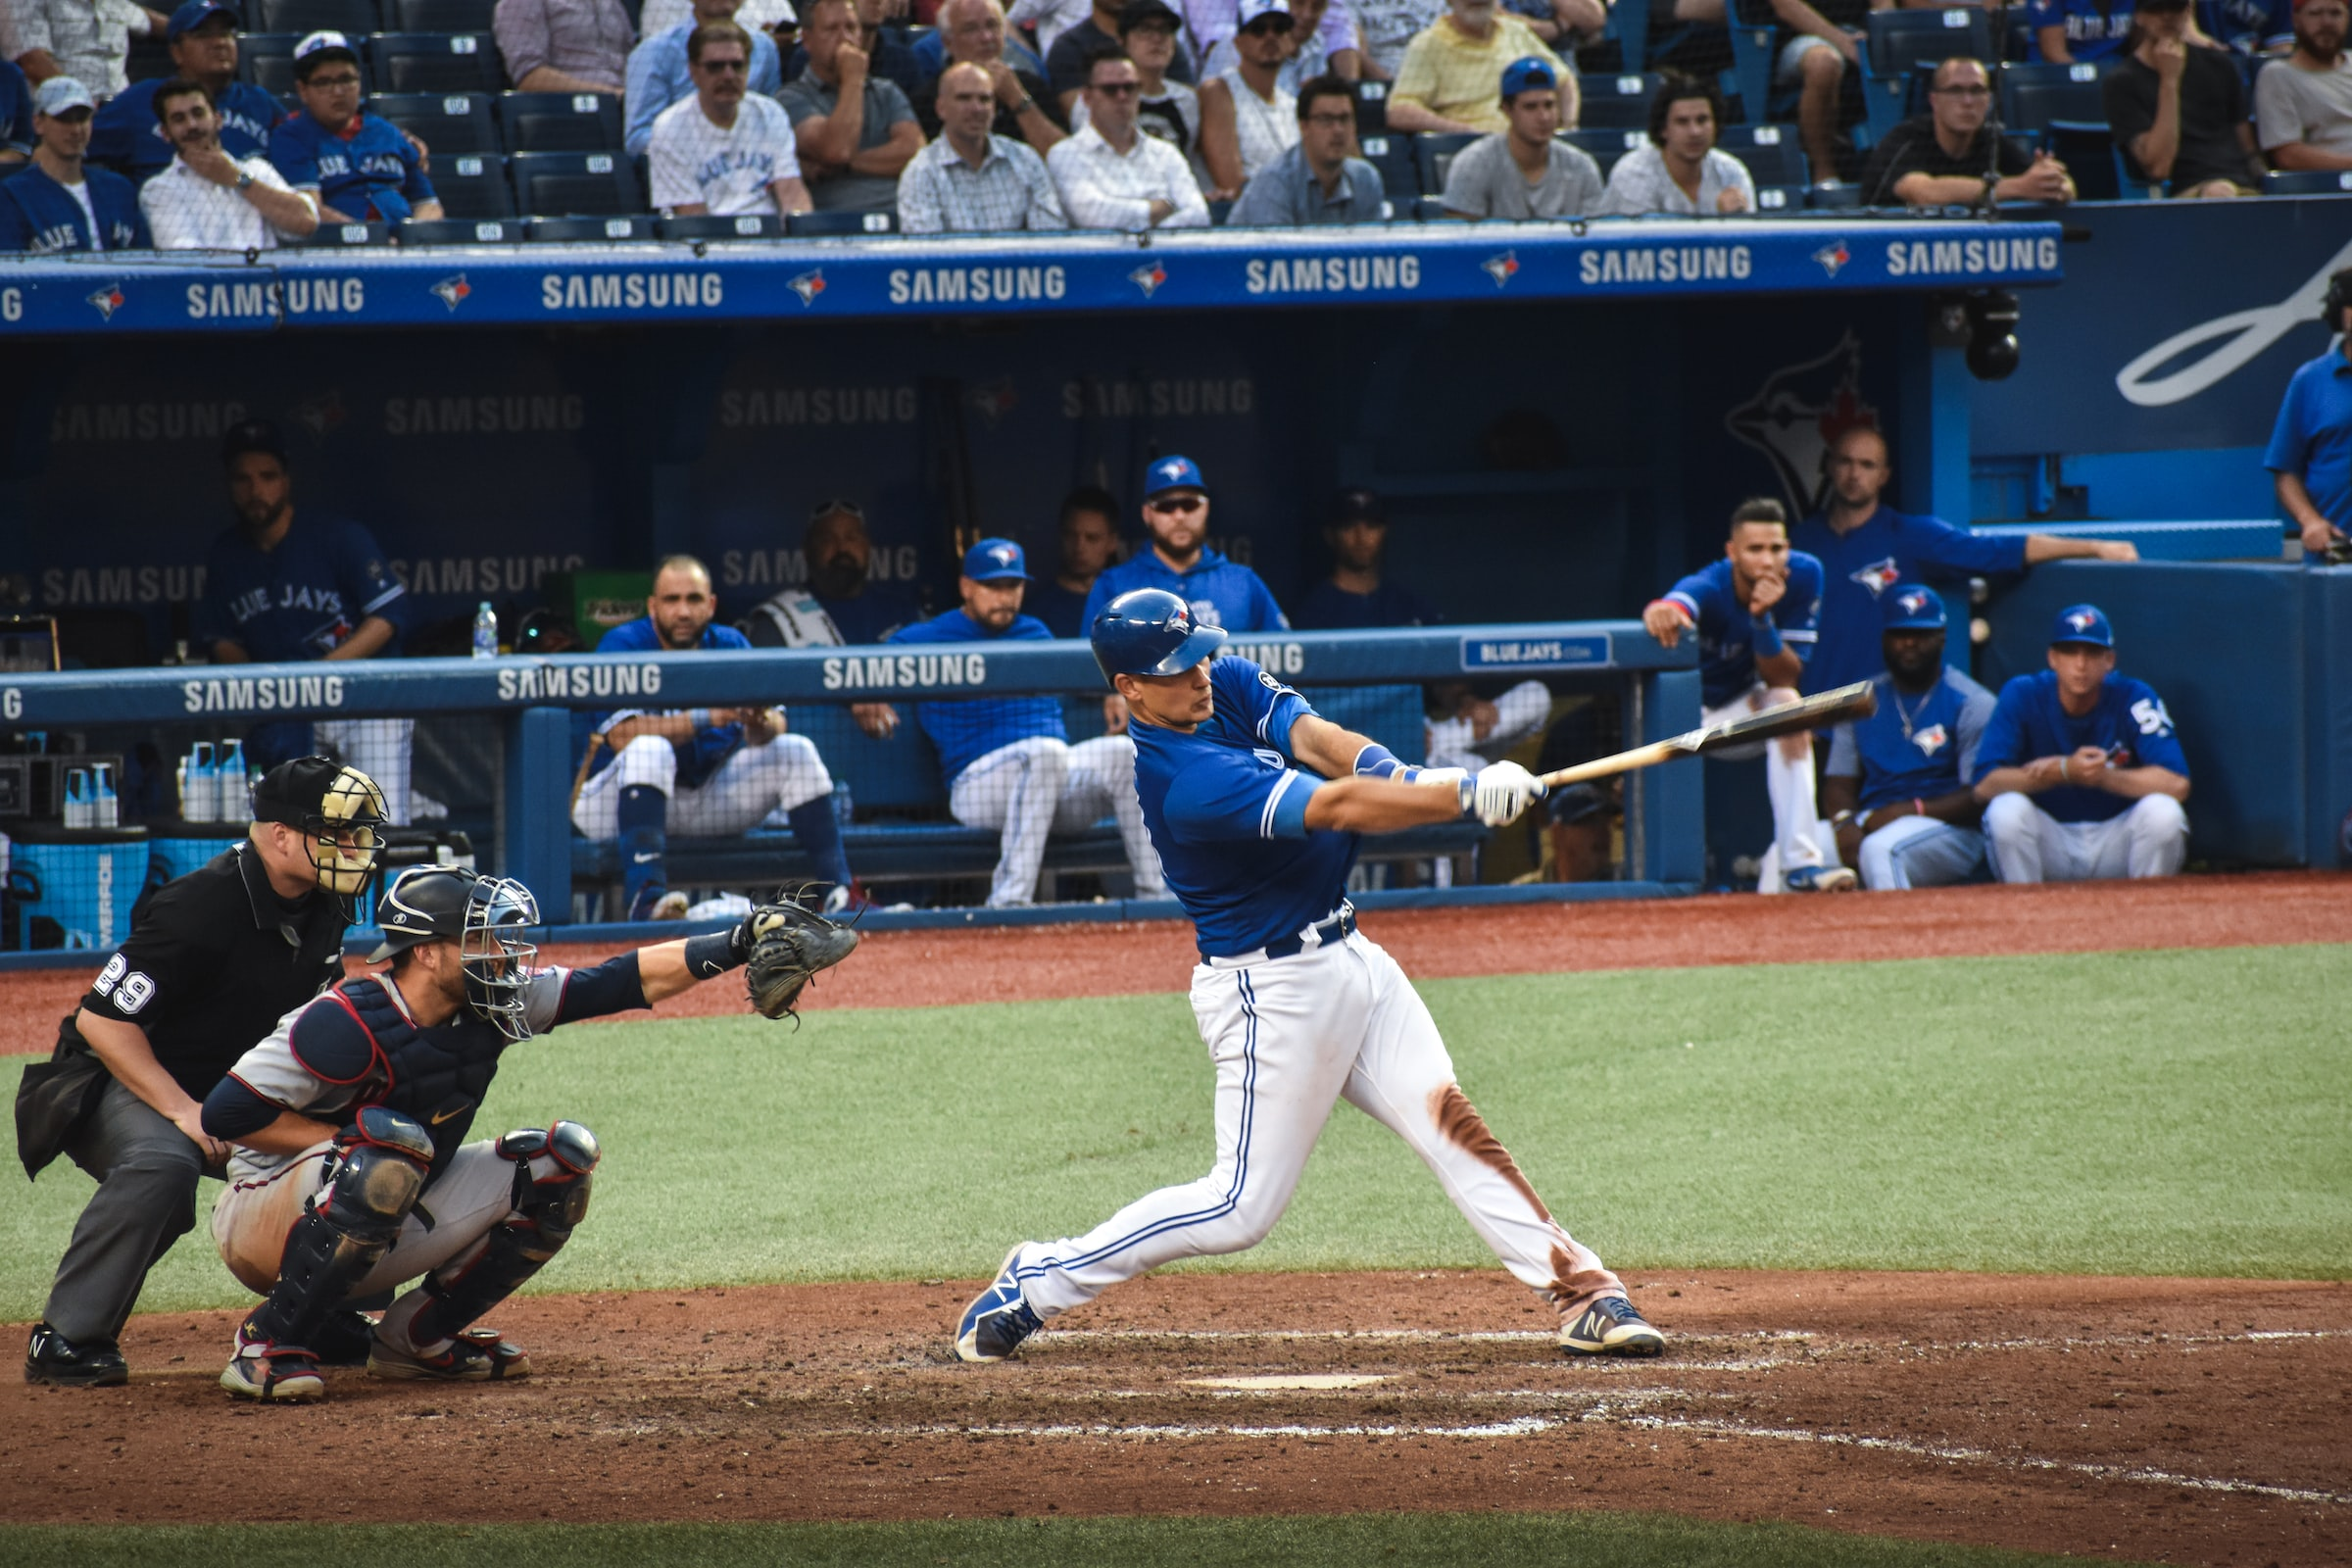

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">INTRODUCTION ⚾</span>
</div>

<div style = 'text-align: left;'>
    <span style="font-family:cursive; font-size: 20px">💡 About the data</span>
</div>

<div>
    <p style="font-family:cursive; font-size: 16px"> 👉 A data frame with 322 observations of major league players on the following 20 variables: <br> AtBat: Number of times at bat in 1986. <br> Hits: Number of hits in 1986. <br>HmRun: Number of home runs in 1986. <br>Runs: Number of runs in 1986. <br> RBI: Number of runs batted in in 1986. <br> Walks: Number of walks in 1986. <br> Years: Number of years in the major leagues. <br> CAtBat: Number of times at bat during his career. <br> CHits: Number of hits during his career. <br> CHmRun: Number of home runs during his career. <br> CRuns: Number of runs during his career. <br> CRBI: Number of runs batted in during his career. <br> CWalks: Number of walks during his career. <br> League: A factor with levels A and N indicating player's league at the end of 1986. <br> Division: A factor with levels E and W indicating player's division at the end of 1986. <br> PutOuts: Number of put outs in 1986. <br> Assists: Number of assists in 1986. <br>  Errors: Number of errors in 1986. <br> Salary: 1987 annual salary on opening day in thousands of dollars. <br> NewLeague: A factor with levels A and N indicating player's league at the beginning of 1987. <br>
    </p>
</div>

<div style = 'text-align: center;'>
    <span style="font-family:cursive; font-size: 24px">Table of Contents</span>
</div>

* [Data Analysis](#data_analysis)
    * [The Target Varibales](#target)
    * [The Varibale Types](#types)
        * [Numerical Features](#numerical_features)
            * [Yeojohnson Transformation](#yeo)
            * [Box-Cox Transformation](#box)
            * [Square root Transformaton](#sqrt)
            * [Outliers](#outliers)
        * [Categorical Features](#cat)
* [Feature Engineering](#feature_eng)
    * [Train-Test Split](#split)
    * [Numerical Transformations](#numerical_trans)
        * [Applying Yeojohnson Transformation](#yeo_trans)
        * [Applying Box-Cox Transformation](#box_trans)
        * [Applying Square root Transformation](#sqrt_trans)
        * [Handling Outliers](#handle_outliers)
    * [Categorical Transformations](#cat_features)
* [Feature Scaling](#scaling)
* [Regression Models](#models)
    * [Linear Regression](#linear)
    * [Huber Regression](#huber)
    * [Support Vector Regression](#svr)
    * [Random Forest Regression](#random)
    * [Decision Tree Regression](#decision)
* [Summary Metrics](#metrics)

In [1]:
!pip install feature-engine

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import scipy.stats as stats

from sklearn.model_selection import train_test_split

# Feature Engineering
from feature_engine.transformation import YeoJohnsonTransformer, BoxCoxTransformer, PowerTransformer
from feature_engine.encoding import OrdinalEncoder

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Regression Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 1.0 MB/s eta 0:00:00


<h1>Data Analysis</h1>
<a id='data_analysis'></a>

In [2]:
dataset = pd.read_csv('../input/hitters-baseball-data/Hitters.csv')
print(dataset.shape)

dataset.head()

(322, 20)


AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

In [3]:
dataset.dropna(subset = ['Salary'], inplace = True)
dataset.shape

(263, 20)

<h2>The Target Feature</h2>
<a id='target'></a>

> It's important to transform our target feature close to normal distribution beause of it's advantages. 
> > Normal distribution is symmetric. Mean, Median and Mode are equal And half the population lies below the mean and half the population lies above the mean.

> > One of the major advantage is that, if the feature is normally distributed, we know that, 68% of the data lies in ${\pm}$1 stds, 95% of the data lies in ${\pm}$2 stds and 99.7% of the data lies under ${\pm}$3 stds!

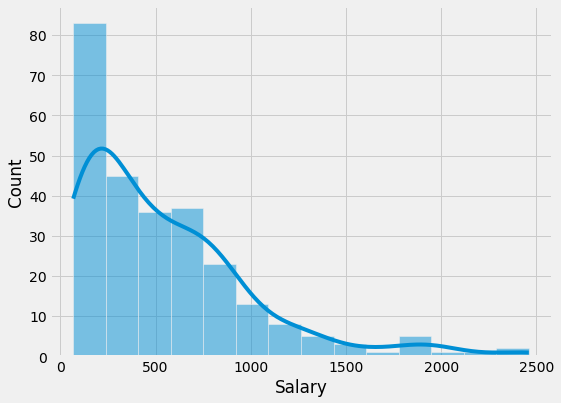

In [4]:
fig = plt.figure(figsize = (8, 6))
sns.histplot(dataset['Salary'], kde = True)

plt.show()

> As we can see, the salary distribution is right skewed. We need to apply suitable transformations to make it better

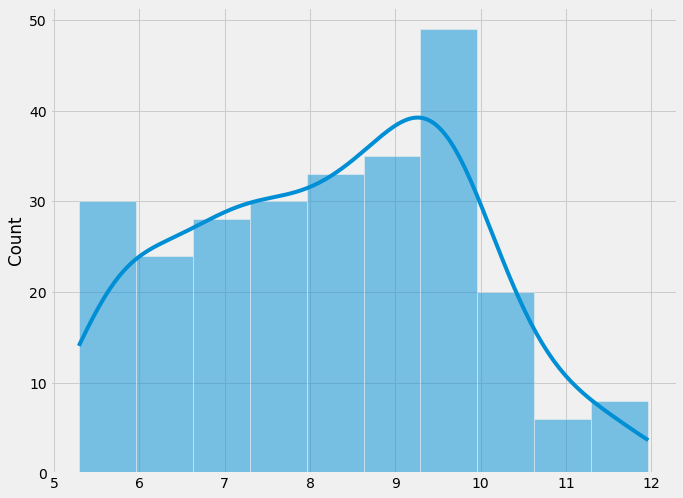

In [5]:
fig = plt.figure(figsize = (10, 8))

fitted_target, param = stats.yeojohnson(dataset['Salary'])
sns.histplot(fitted_target, kde = True)

plt.show()

> Yeojohnson transformation performed well, but let's try to improve the distribution more!

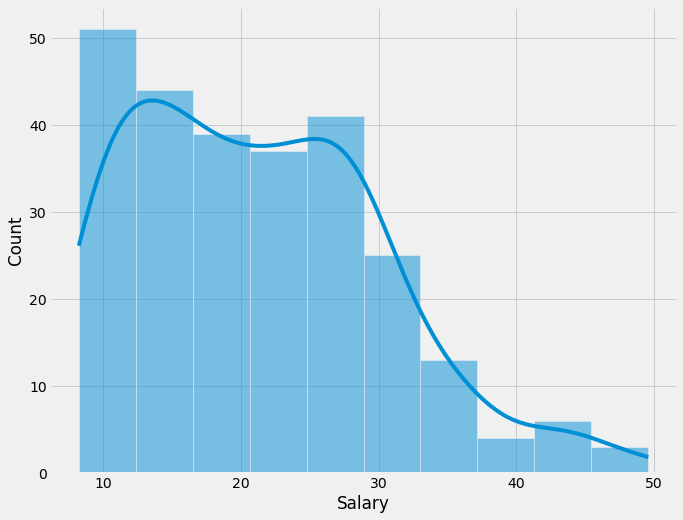

In [6]:
fig = plt.figure(figsize = (10, 8))
sns.histplot(np.sqrt(dataset['Salary']), kde = True)

plt.show()

> Square root transformation didn't change the original distribution of the target (Salary) feature.

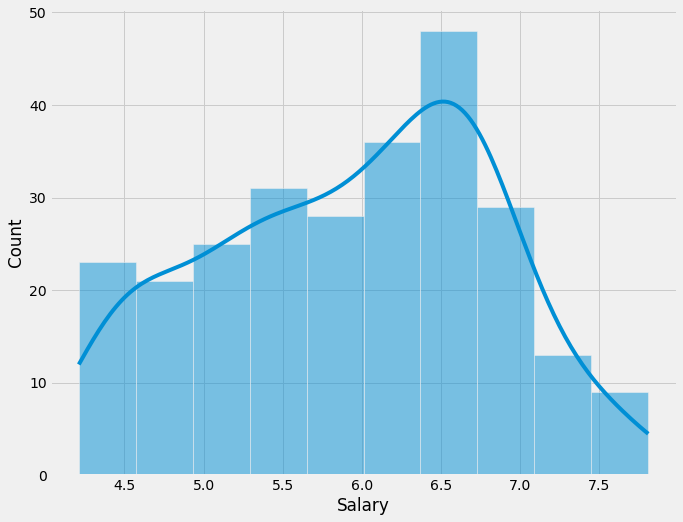

In [7]:
fig = plt.figure(figsize = (10, 8))
sns.histplot(np.log(dataset['Salary']), kde = True)

plt.show()

> Log Transformation performed quite similar to yeojohnson transformation, infact this is better! So, we can use this.

<h2>The Variables Types</h2>
<a id='types'></a>

In [8]:
dataset.describe()

AtBat        Hits       HmRun        Runs         RBI       Walks  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   403.642586  107.828897   11.619772   54.745247   51.486692   41.114068   
std    147.307209   45.125326    8.757108   25.539816   25.882714   21.718056   
min     19.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%    282.500000   71.500000    5.000000   33.500000   30.000000   23.000000   
50%    413.000000  103.000000    9.000000   52.000000   47.000000   37.000000   
75%    526.000000  141.500000   18.000000   73.000000   71.000000   57.000000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

            Years        CAtBat        CHits      CHmRun        CRuns  \
count  263.000000    263.000000   263.000000  263.000000   263.000000   
mean     7.311787   2657.543726   722.186312   69.239544   361.220532   
std      4.793616   2286.582929   648.199644   82.197581   331.198571   
min      1.000000     19.000000     4.000000    0.000000     2.000000   
25%      4.000000    842.500000   212.000000   15.000000   105.500000   
50%      6.000000   1931.000000   516.000000   40.000000   250.000000   
75%     10.000000   3890.500000  1054.000000   92.500000   497.500000   
max     24.000000  14053.000000  4256.000000  548.000000  2165.000000   

              CRBI       CWalks      PutOuts     Assists      Errors  \
count   263.000000   263.000000   263.000000  263.000000  263.000000   
mean    330.418251   260.266160   290.711027  118.760456    8.593156   
std     323.367668   264.055868   279.934575  145.080577    6.606574   
min       3.000000     1.000000     0.000000    0.000000    0.000000   
25%      95.000000    71.000000   113.500000    8.000000    3.000000   
50%     230.000000   174.000000   224.000000   45.000000    7.000000   
75%     424.500000   328.500000   322.500000  192.000000   13.000000   
max    1659.000000  1566.000000  1377.000000  492.000000   32.000000   

            Salary  
count   263.000000  
mean    535.925882  
std     451.118681  
min      67.500000  
25%     190.000000  
50%     425.000000  
75%     750.000000  
max    2460.000000

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [10]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object' and feature != 'Salary']
print('Total number of numerical features: ', len(numerical_features))

print(numerical_features)

Total number of numerical features:  16
['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']


In [11]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'object']
print('Total number of categorical features: ', len(categorical_features))

print(categorical_features)

Total number of categorical features:  3
['League', 'Division', 'NewLeague']


<h3>Numerical Features</h3>
<a id='numerical_features'></a>

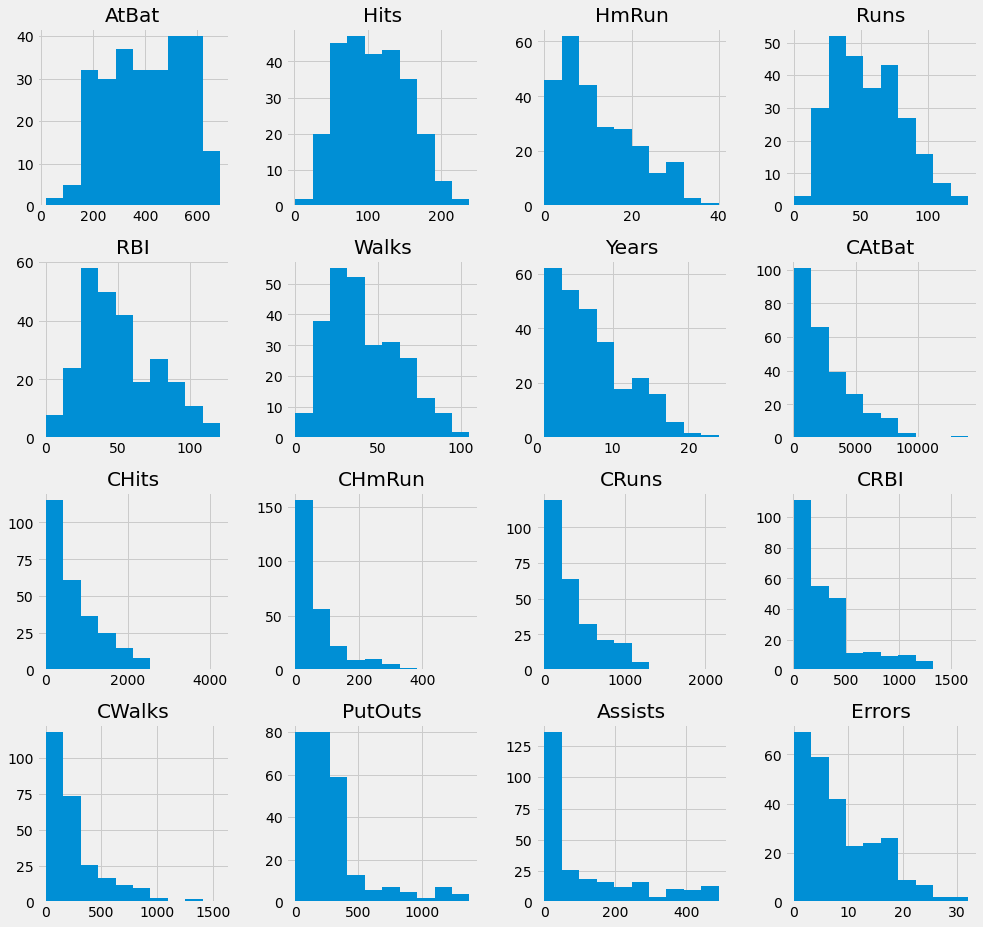

In [12]:
dataset[numerical_features].hist(figsize = (15, 15))

plt.show()

> So many distributions are right skewed. For better model performance, we need to convert these skewed distributions closer to normal distributions.

<h4>Yeojohnson Transformation</h4>
<a id='yeo'></a>

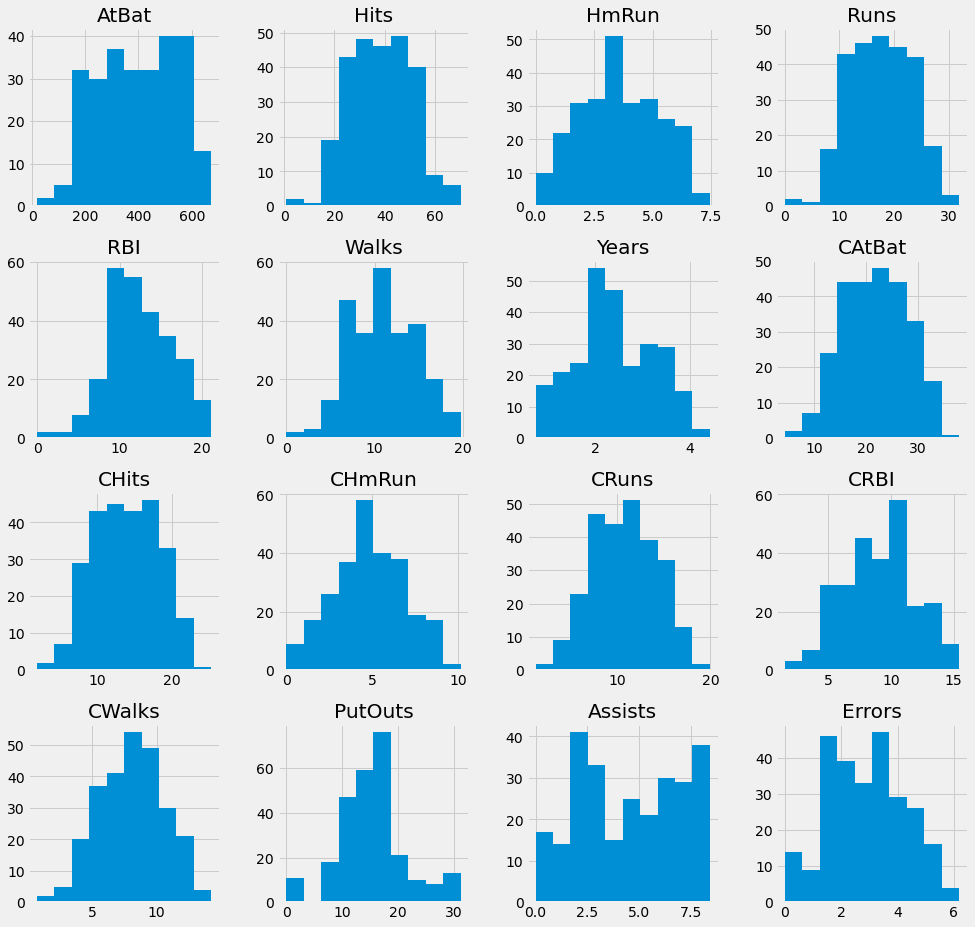

In [13]:
temp_data = dataset.copy()

for feature in numerical_features:
    temp_data[feature], param = stats.yeojohnson(dataset[feature])
    
temp_data[numerical_features].hist(figsize = (15, 15))
plt.show()

> Woah! yeojohnson transformation worked like a gem. As we can see, after applying this transformation, many of our variables are similar to normal distribution.

> We will take those variables which are suitable for yeojohnson transformation, and let's continue applying other transformations for remaining features.

> But before applying other transformations to the remaining features, let's see how our variables distributions are changed before and after appylying yeojohnson transformation.

In [14]:
def plot_before_after(dataset, transformed_dataset, feature_list):
    
    for feature in feature_list:
        plt.figure(figsize = (15, 6))

        # Plotting original feature distribution w.r.t Salary
        plt.subplot(1, 2, 1)
        plt.scatter(dataset[feature], np.log(dataset['Salary']))
        plt.ylabel('Salary')
        plt.xlabel('Original ' + feature)

        # Plotting transformed feature distribution w.r.t Salary
        plt.subplot(1, 2, 2)
        plt.scatter(temp_data[feature], np.log(dataset['Salary']))
        plt.ylabel('Salary')
        plt.xlabel('Transformed ' + feature)
    
    plt.show()

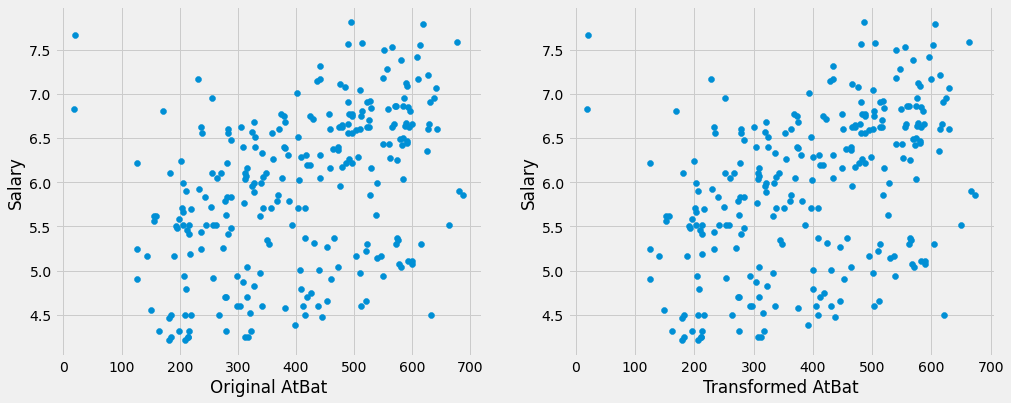

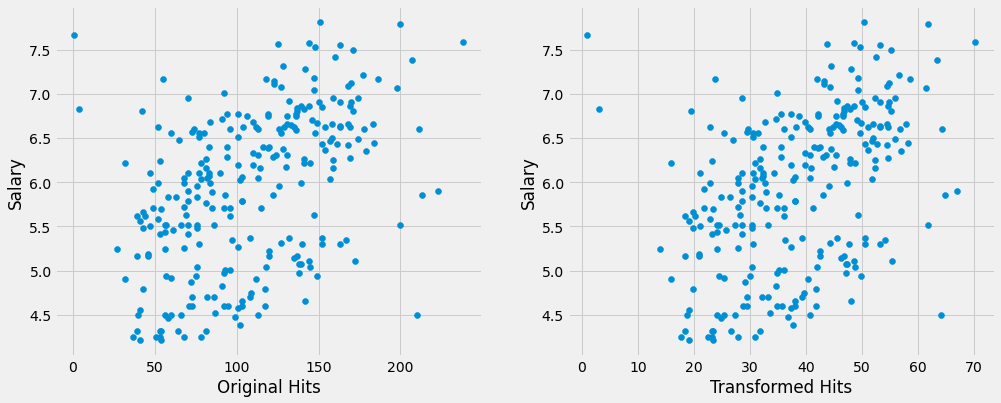

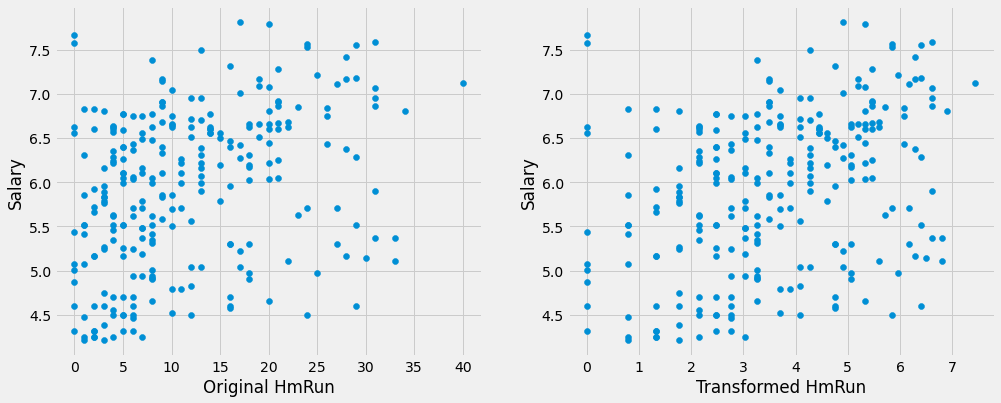

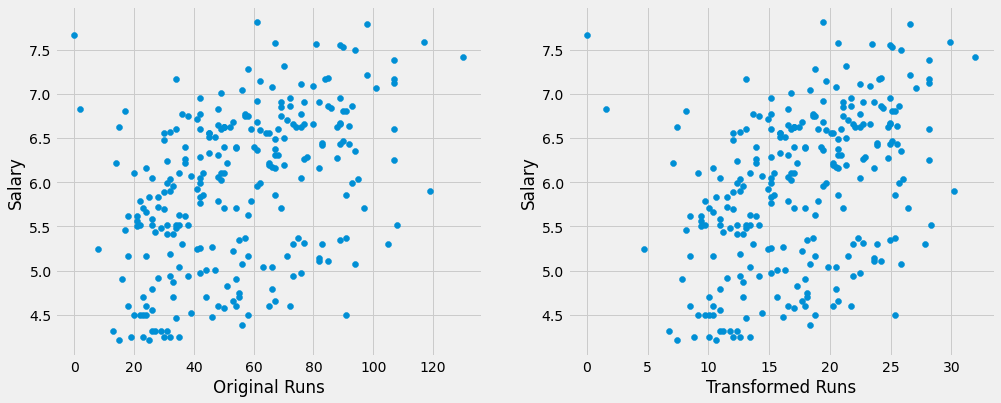

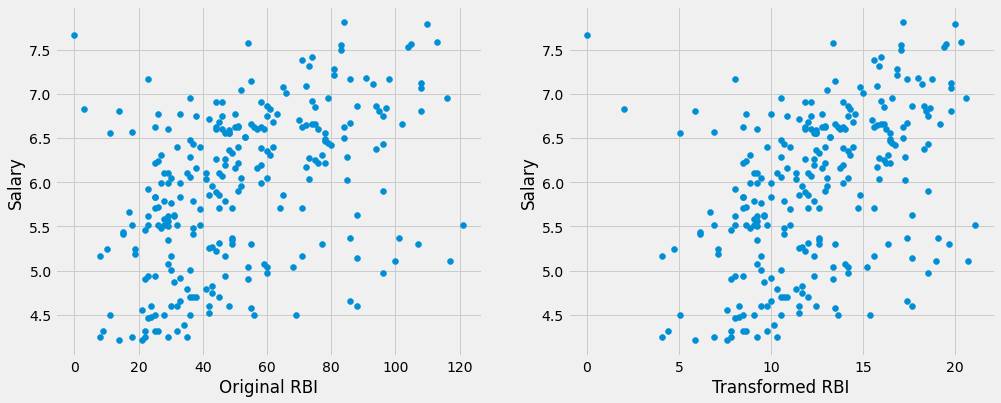

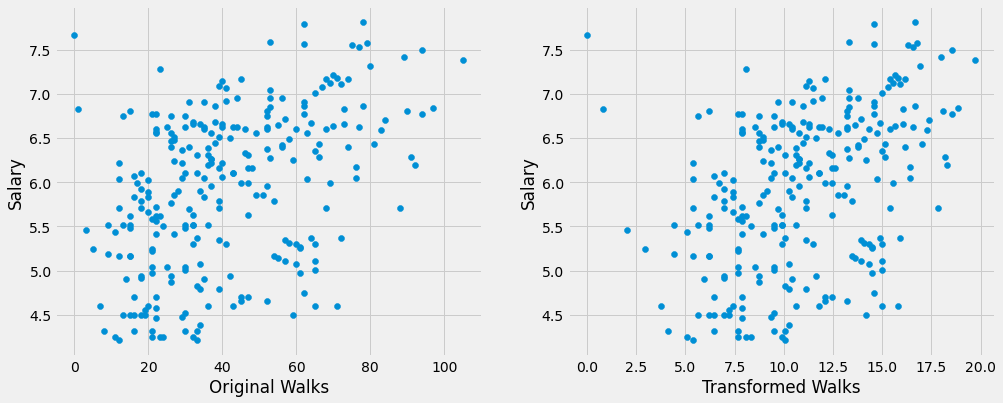

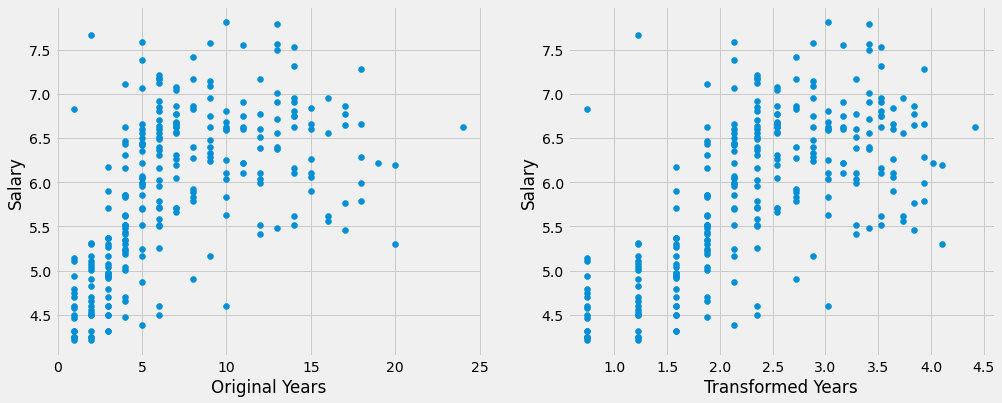

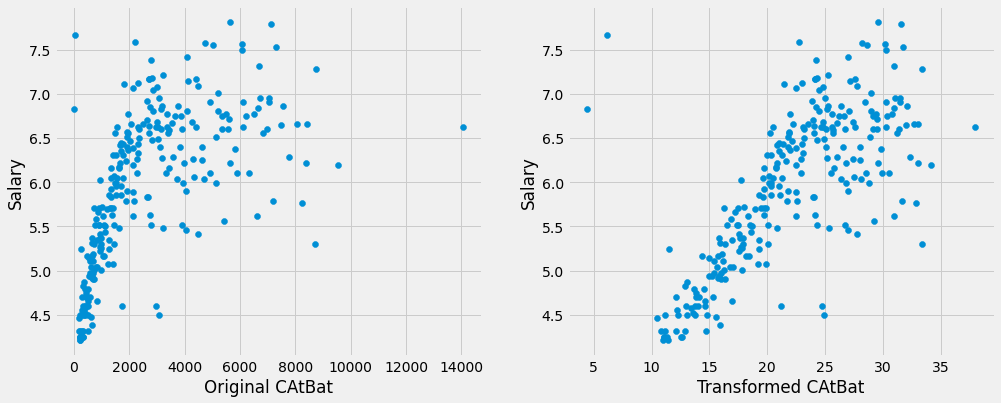

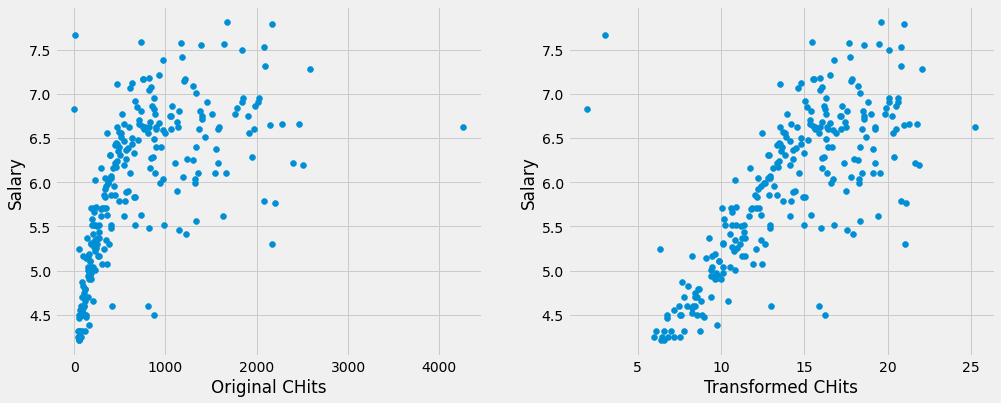

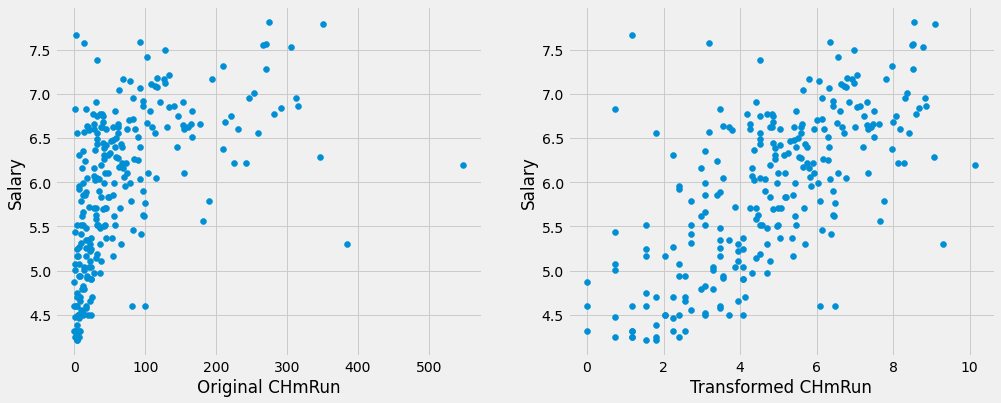

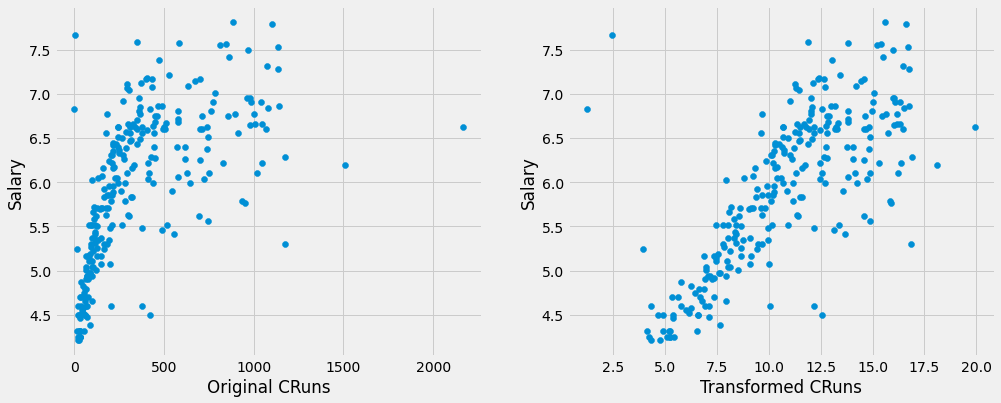

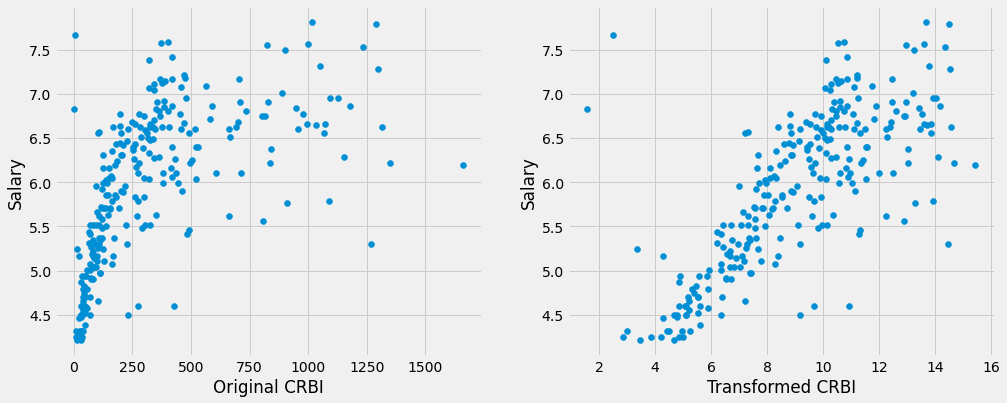

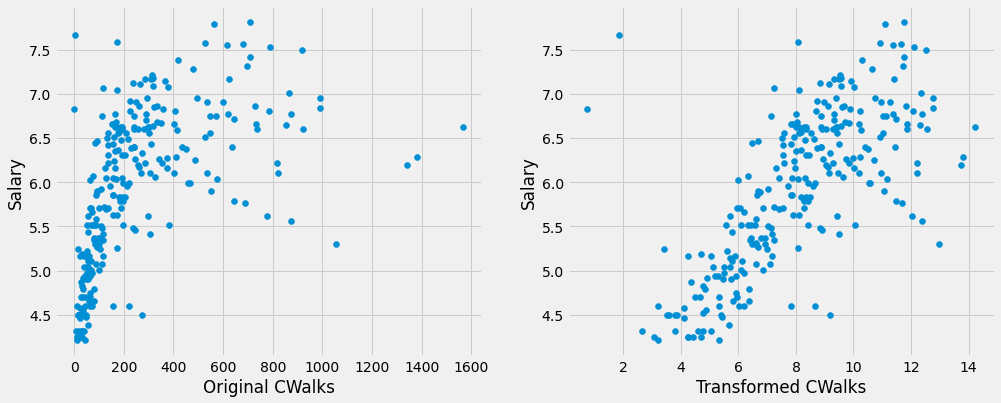

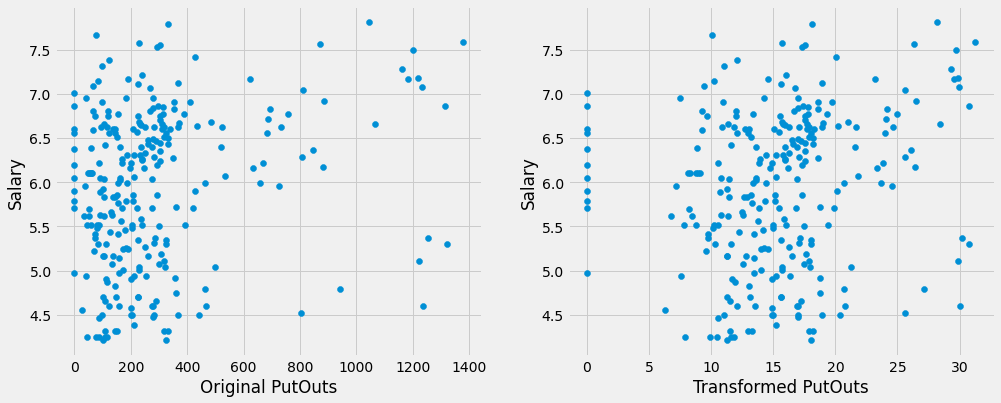

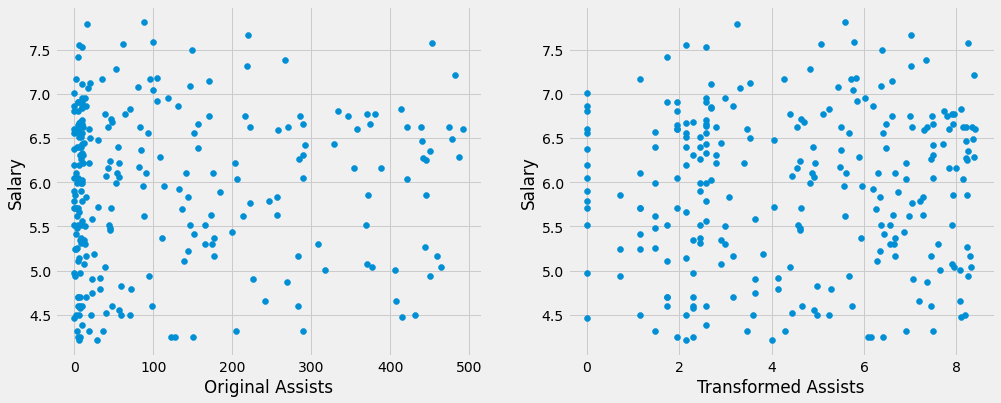

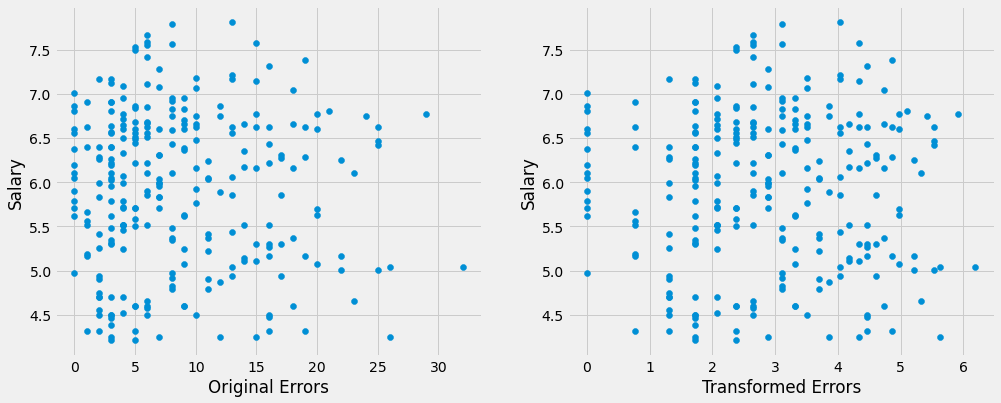

In [15]:
plot_before_after(dataset, temp_data, numerical_features)

> Few variables are very well transformed. Yeojohnson transformer worked pretty good...!

> It is important to look at the distribution of the feature after applying transformations. After applying yeojohnson transformations, many data points tend to be at the center.

In [16]:
to_yeojohnson = ['AtBat', 'HmRun', 'Runs', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Years', 'Assists']

numerical_features = [feature for feature in numerical_features if feature not in to_yeojohnson]
print('Total number of remaining numerical features: ', len(numerical_features))

print(numerical_features)

Total number of remaining numerical features:  4
['Hits', 'RBI', 'Walks', 'Errors']


<h4>Box-Cox Transformation</h4>
<a id='box'></a>

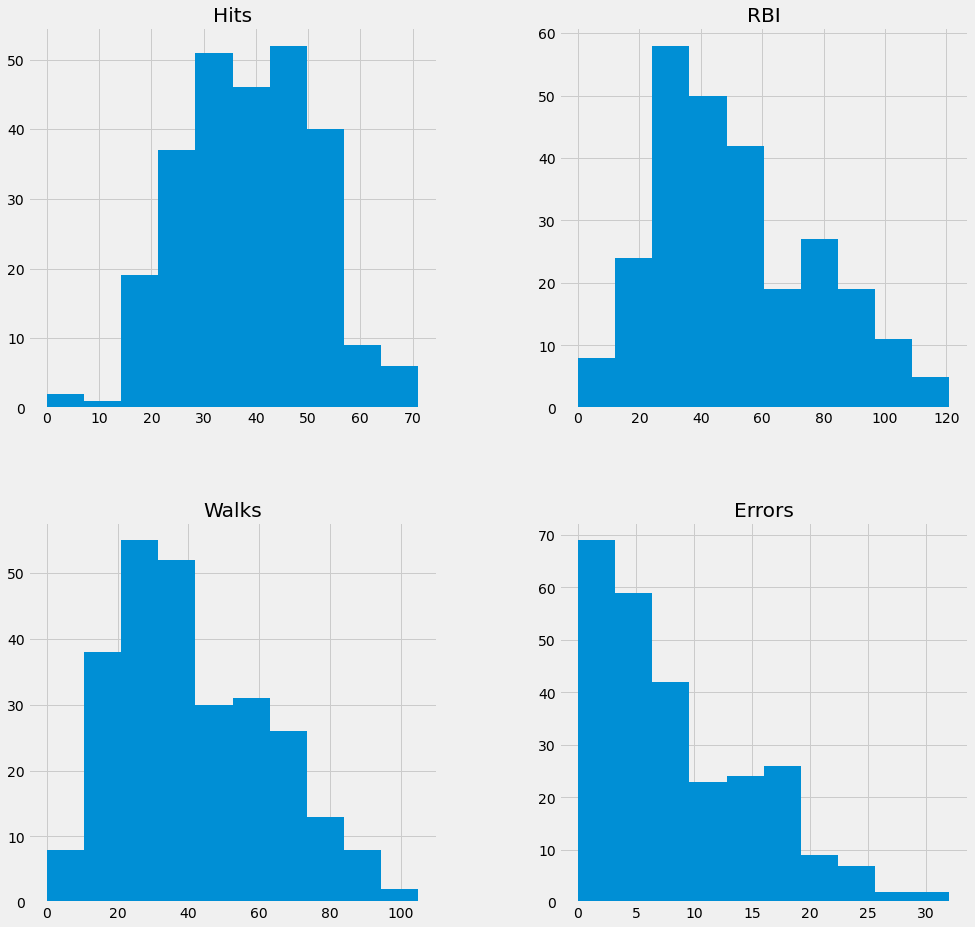

In [17]:
temp_data = dataset[numerical_features].copy()

for feature in numerical_features:
    try:
        temp_data[feature], param = stats.boxcox(dataset[feature])
    except:
        pass

temp_data[numerical_features].hist(figsize = (15, 15))
plt.show()

In [18]:
to_boxcox = ['Hits']

numerical_features = [feature for feature in numerical_features if feature not in to_boxcox]
print('Total number of remaining numerical features: ', len(numerical_features))

print(numerical_features)

Total number of remaining numerical features:  3
['RBI', 'Walks', 'Errors']


<h4>Sqrt Transformation</h4>
<a id='sqrt'></a>

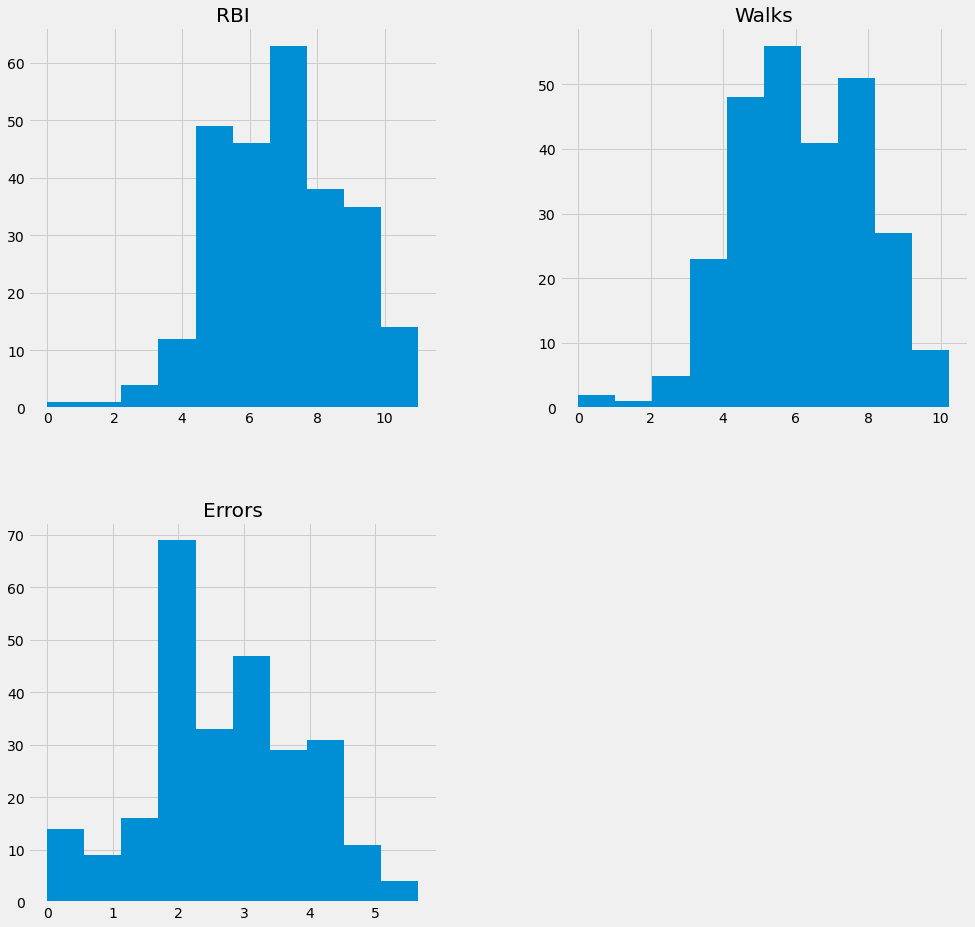

In [19]:
temp_data = dataset[numerical_features].copy()

for feature in numerical_features:
    try:
        temp_data[feature] = np.sqrt(dataset[feature])
    except:
        pass

temp_data[numerical_features].hist(figsize = (15, 15))
plt.show()

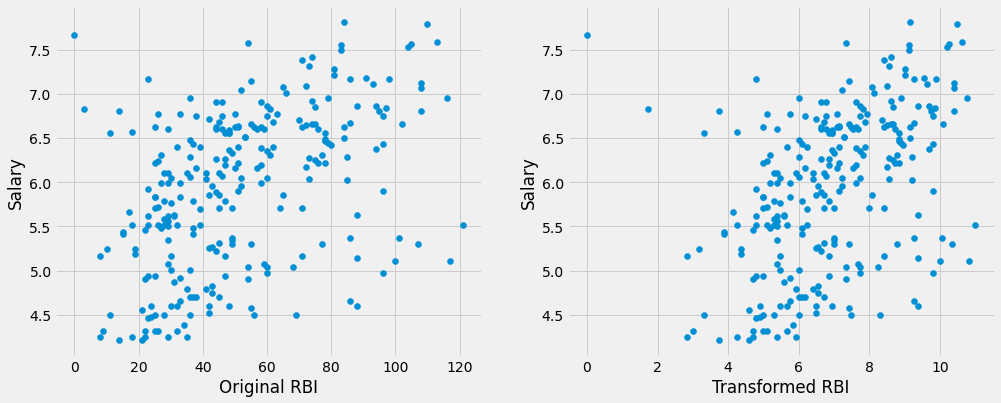

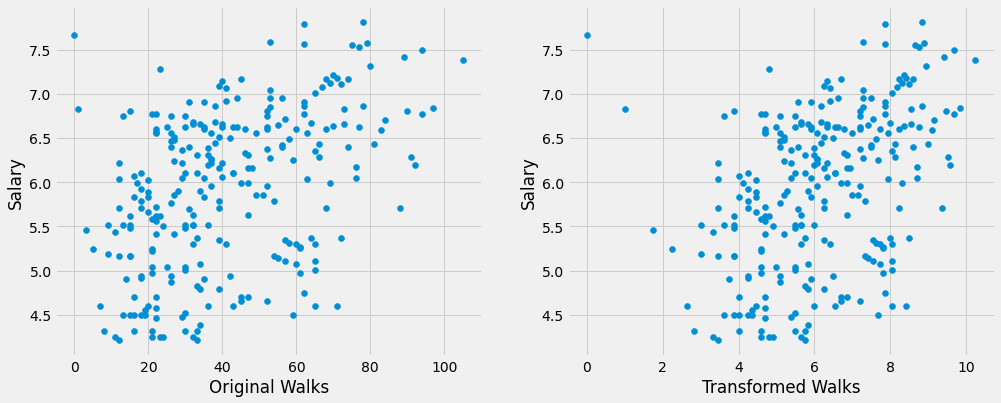

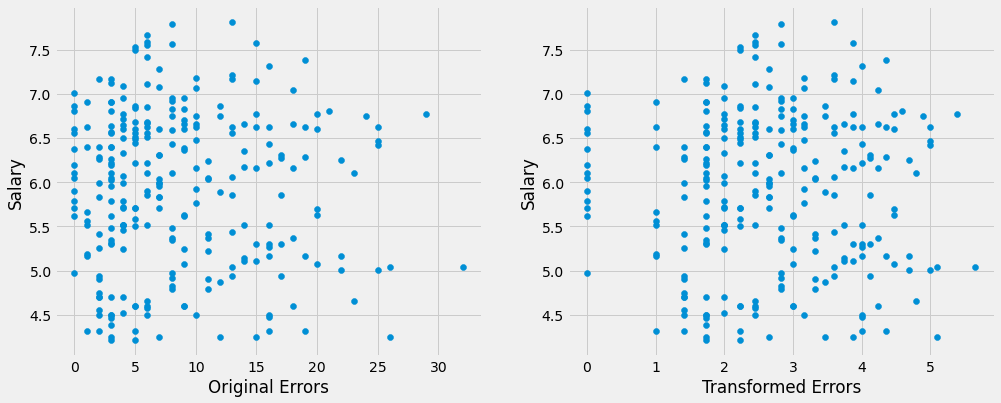

In [20]:
plot_before_after(dataset, temp_data, numerical_features)

In [21]:
to_sqrt = ['RBI', 'Walks', 'Errors']

numerical_features = [feature for feature in numerical_features if feature not in to_sqrt]
print('Total number of remaining numerical features: ', len(numerical_features))

print(numerical_features)

Total number of remaining numerical features:  0
[]


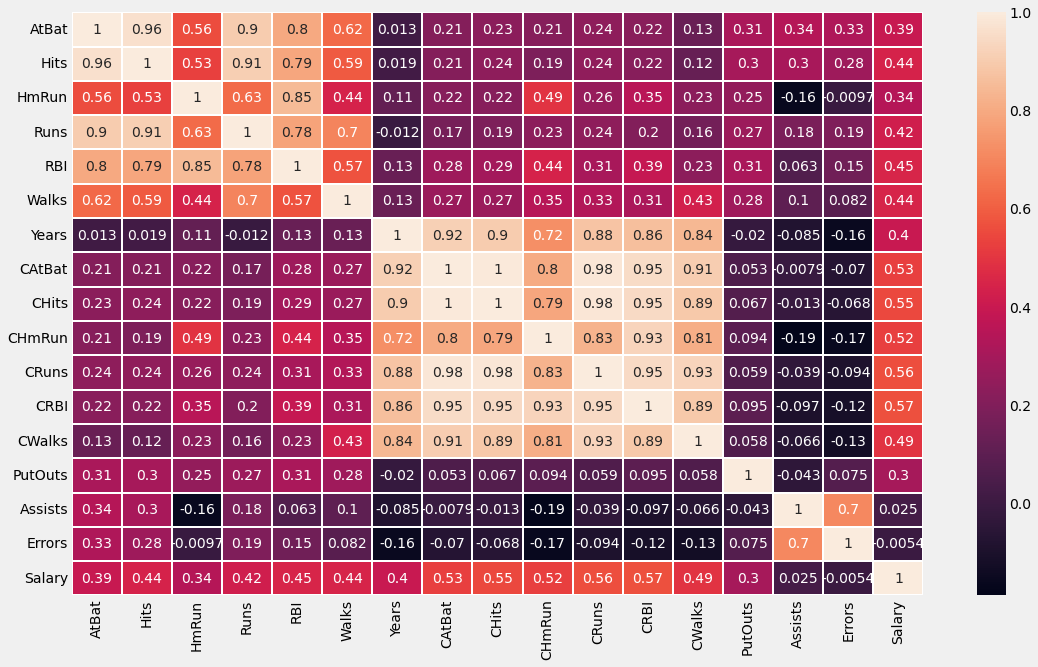

In [22]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object']

fig = plt.figure(figsize = (17, 10))
sns.heatmap(dataset[numerical_features].corr(), annot = True, linewidths = 0.2)

plt.show()

> As we can see there are lot of correlated features, it's better to perform Feature Selection.

<h3>Outliers</h3>
<a id='outliers'></a>

> This methods helps us to analyze single feature with 3 different subplots, namely: Histogram, Q-Q Plot and Boxplot

In [23]:
def check_outliers(df, variable):

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

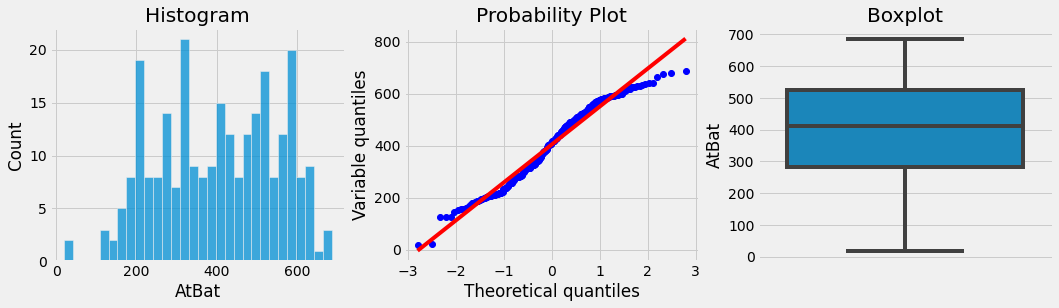

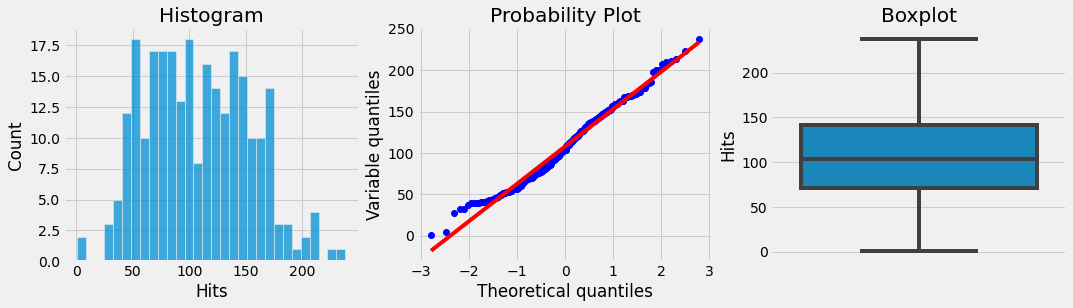

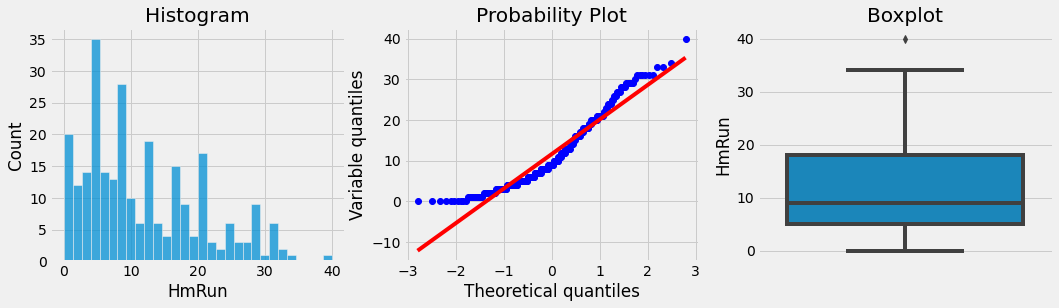

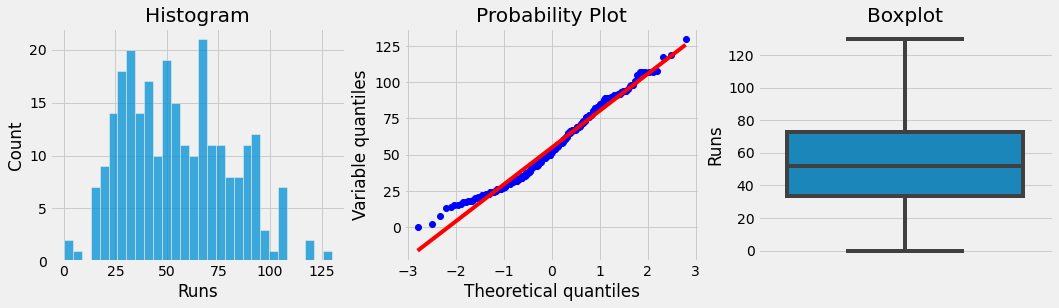

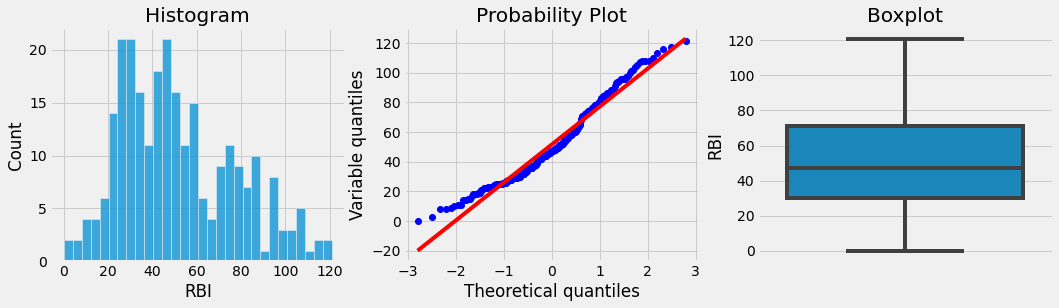

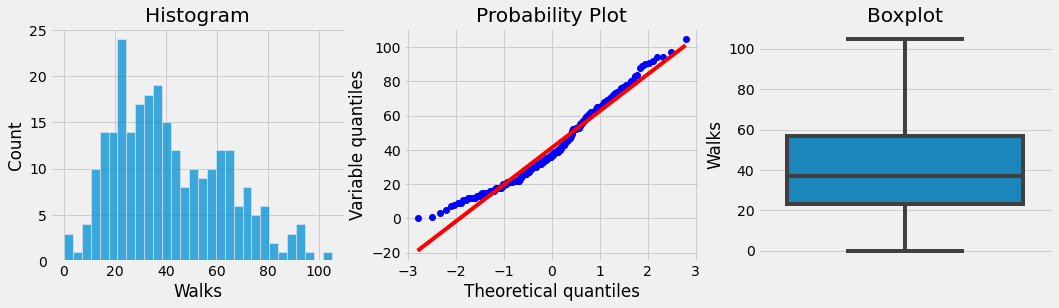

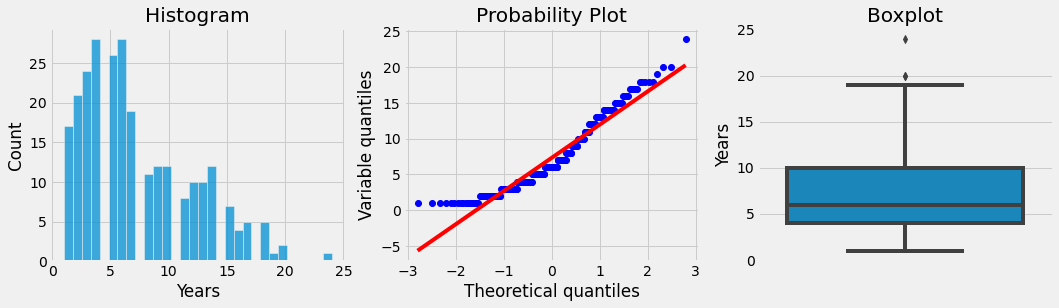

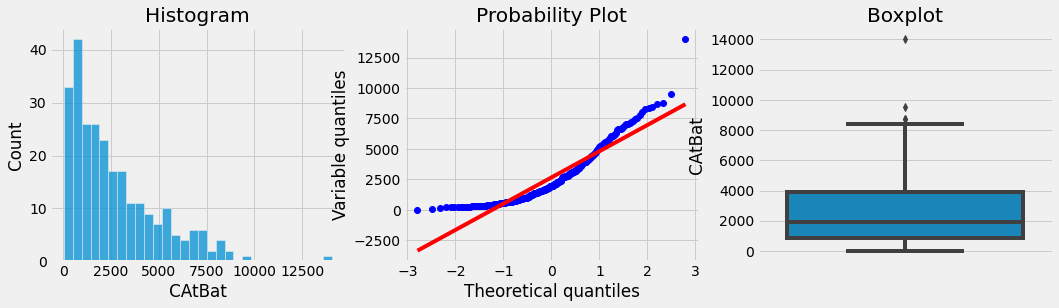

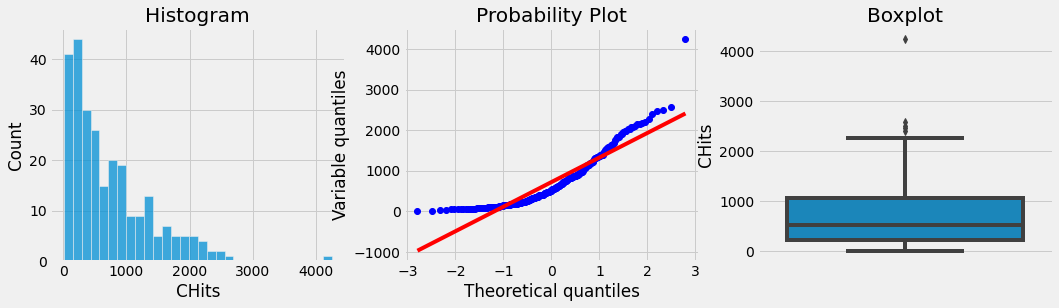

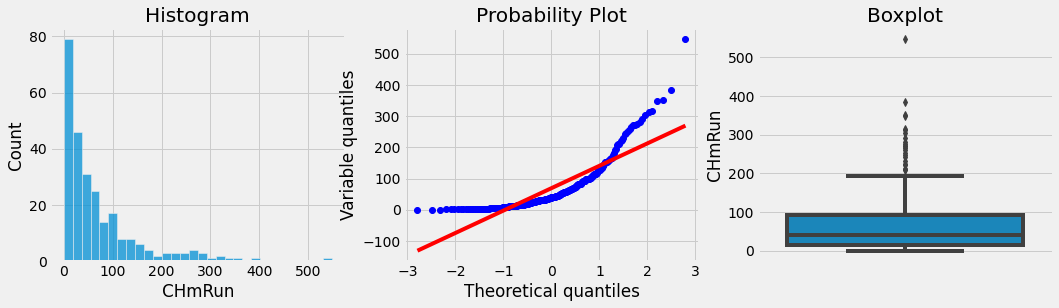

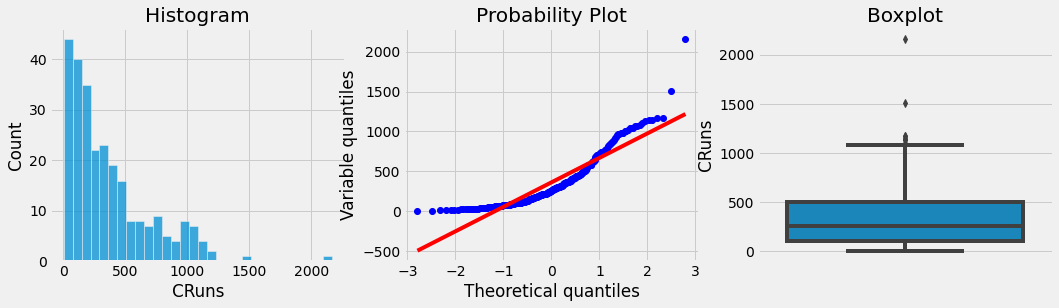

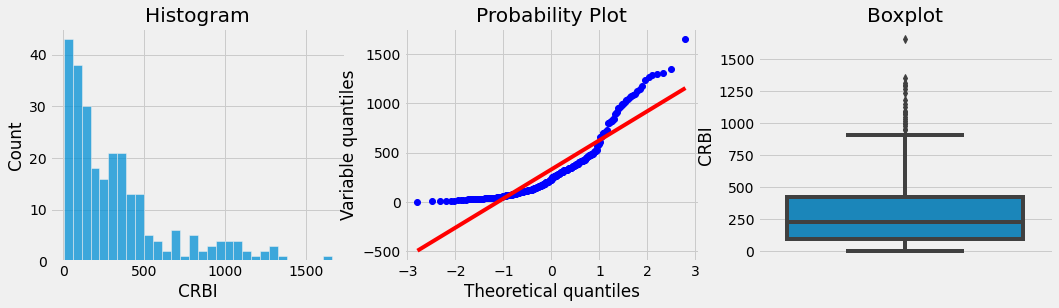

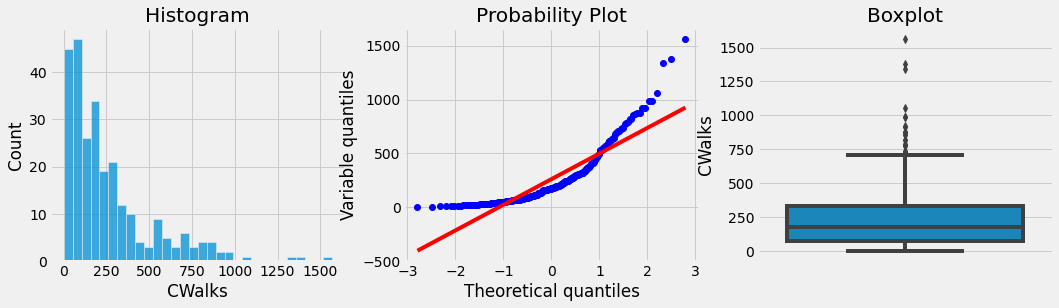

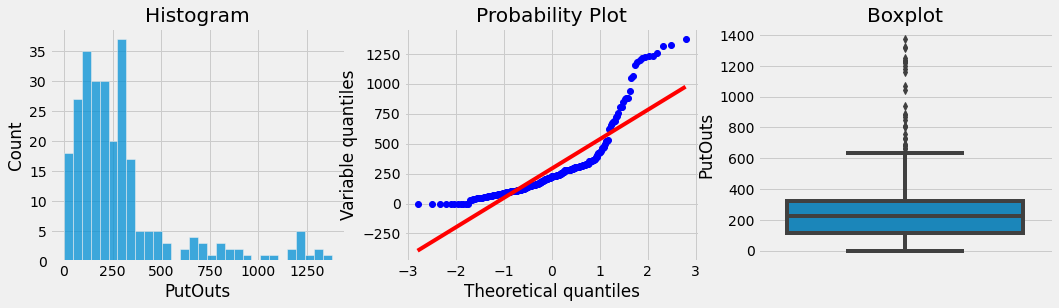

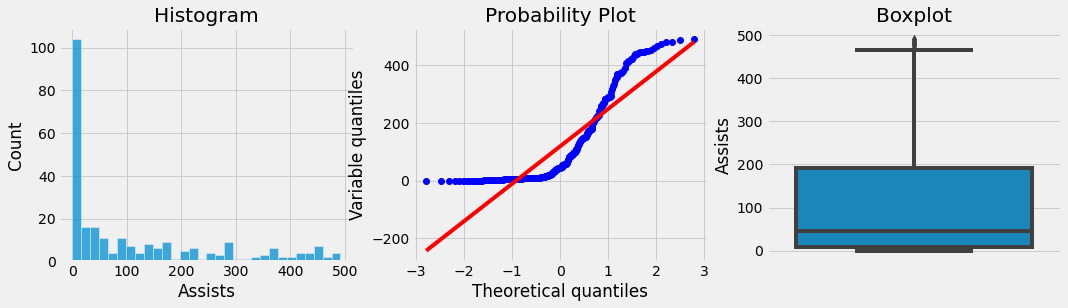

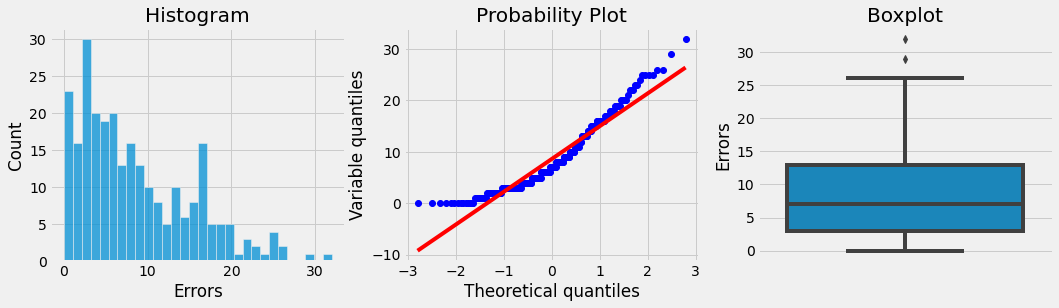

In [24]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'object' and feature != 'Salary']

for feature in numerical_features:
    check_outliers(dataset, feature)

> As we can see, few features have many outliers, linear regression is very sensitive to these outliers so we need to handle them to improve our model performance.

In [25]:
outliers = ['HmRun', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']

from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(capping_method='quantiles', tail='both', fold=0.05, variables=outliers)

windsoriser.fit(dataset)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['HmRun', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns',
                      'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors'])

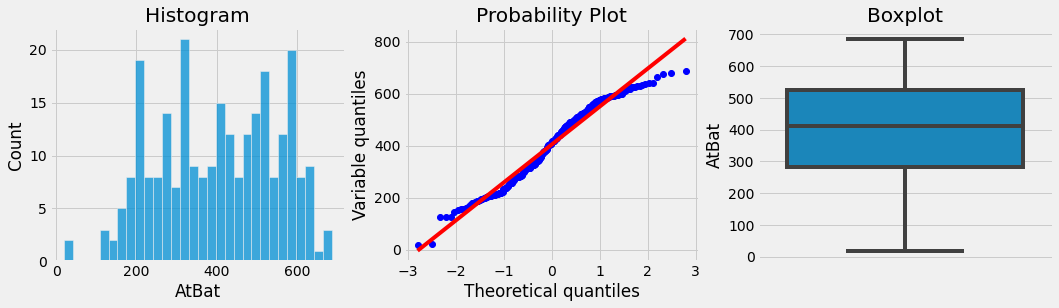

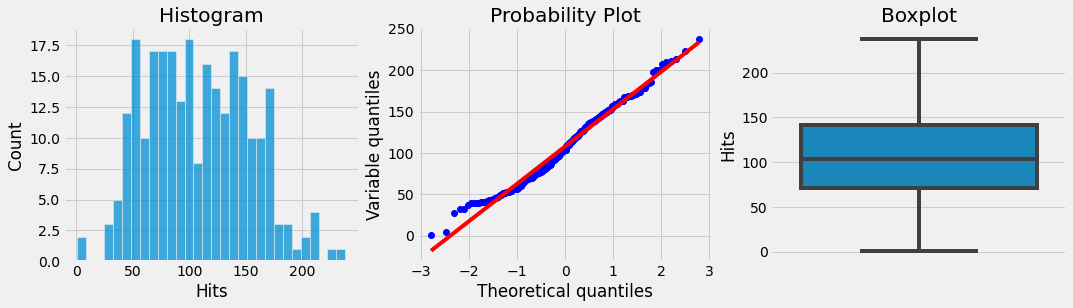

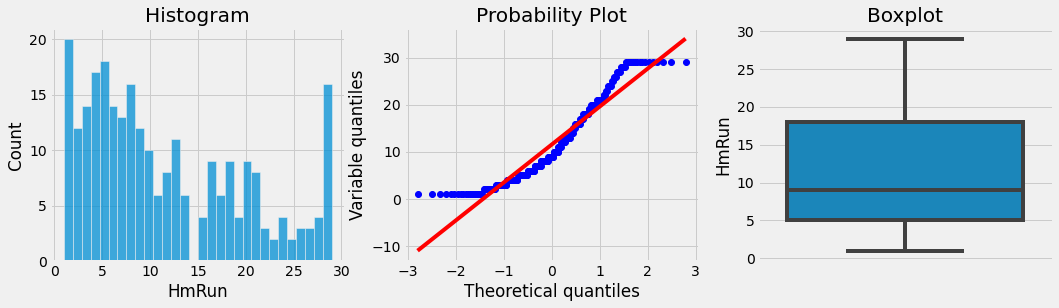

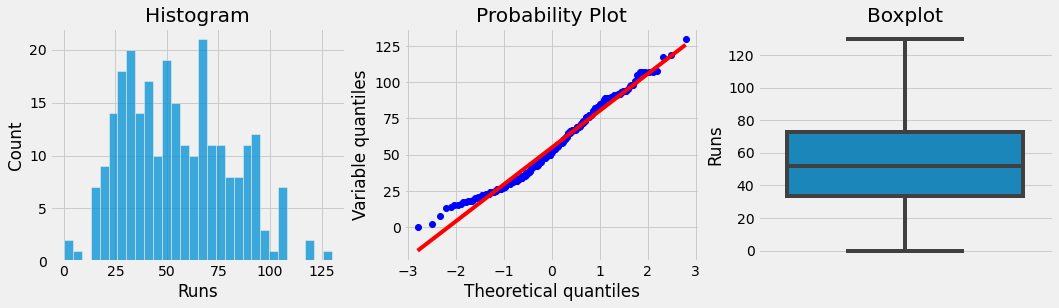

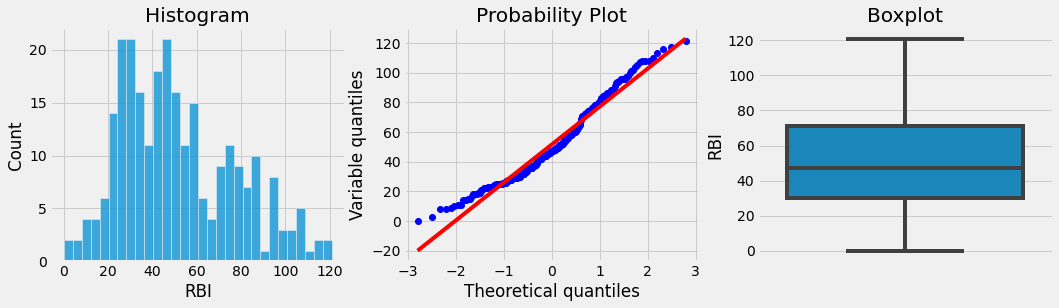

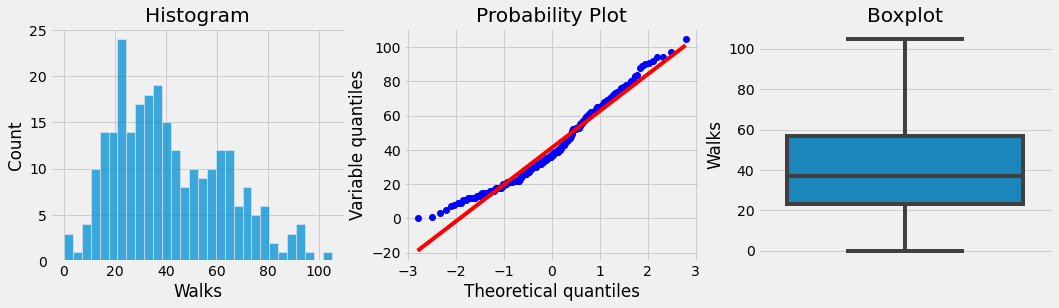

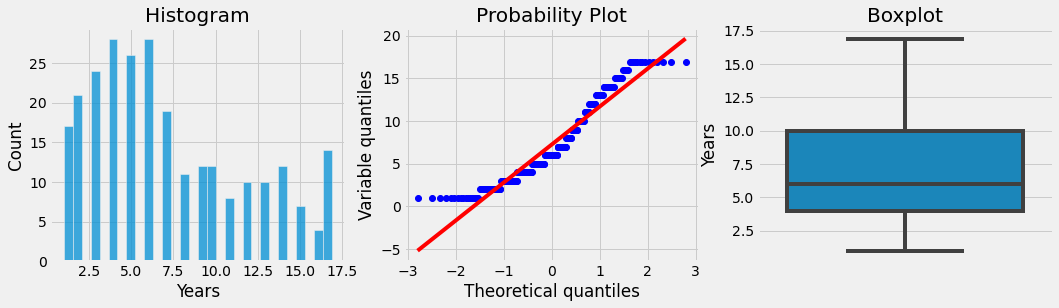

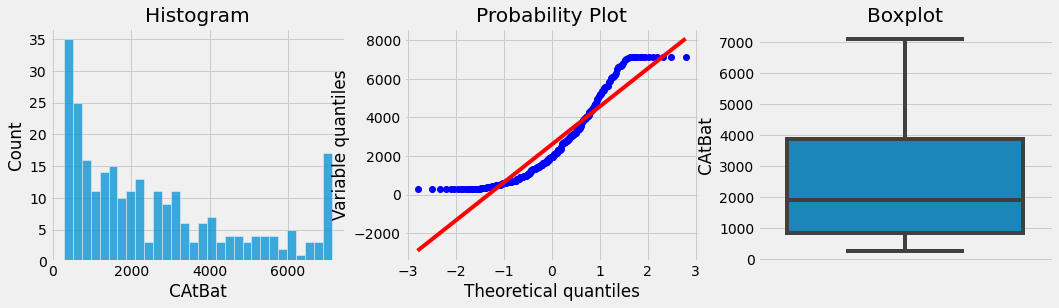

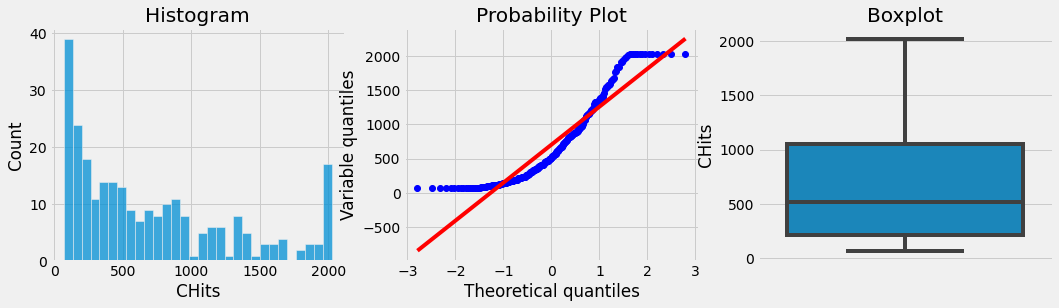

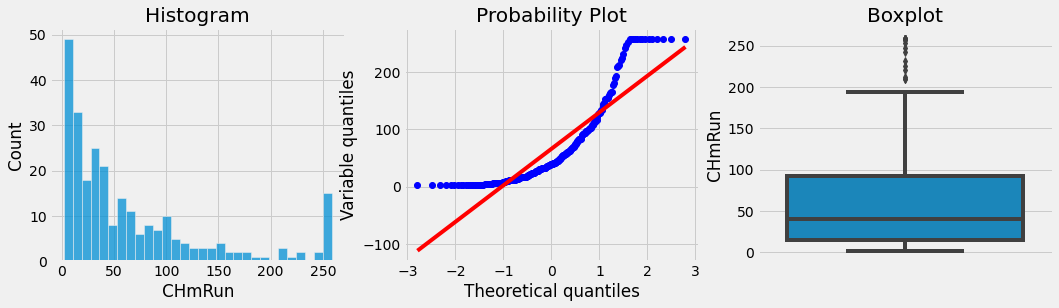

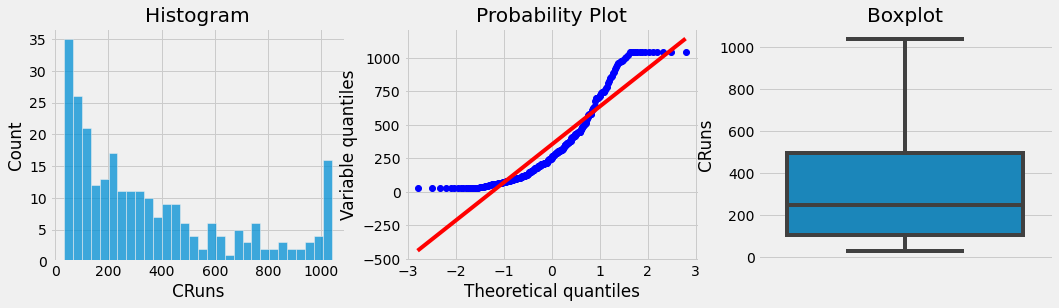

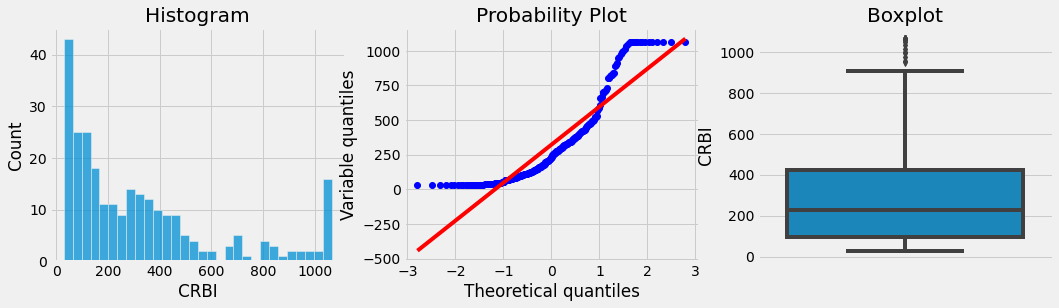

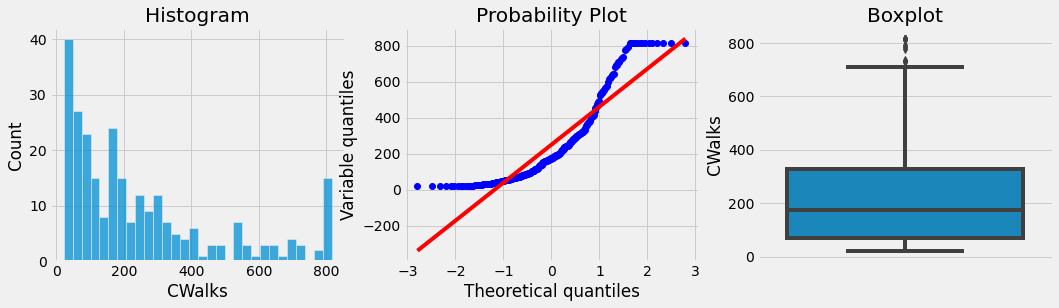

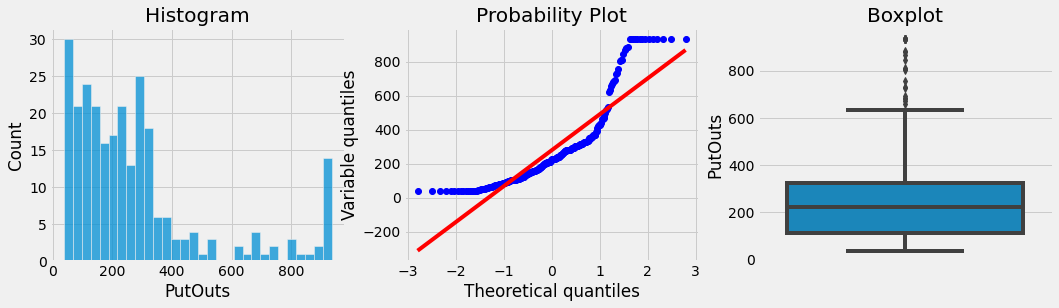

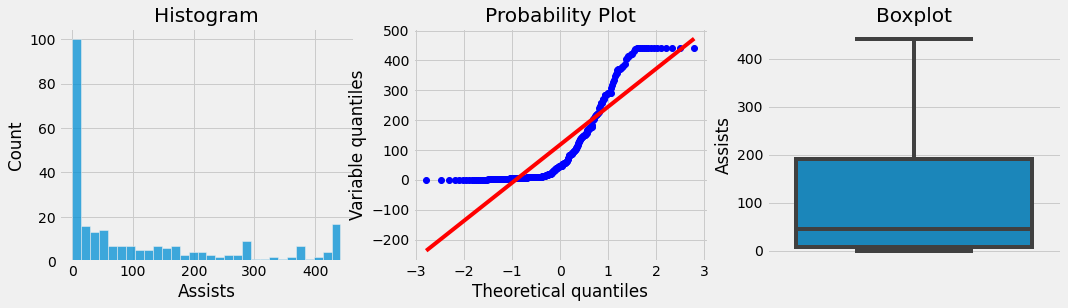

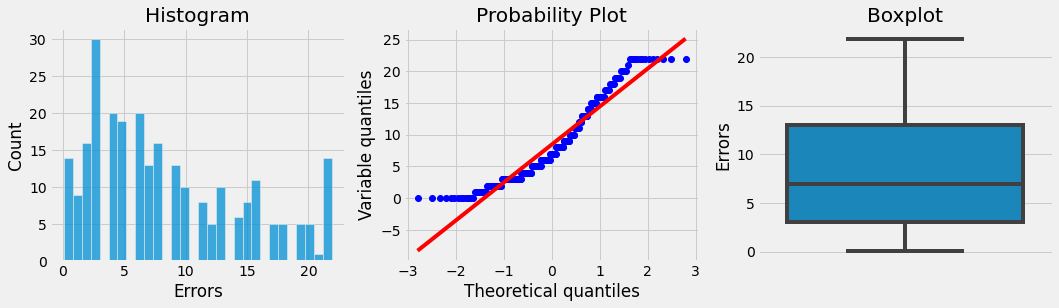

In [26]:
transformed_dataset = windsoriser.transform(dataset)

for feature in numerical_features:
    check_outliers(transformed_dataset, feature)

> So many outliers are capped with this technique.

<h3>Categorical Features</h3>
<a id='cat'></a>

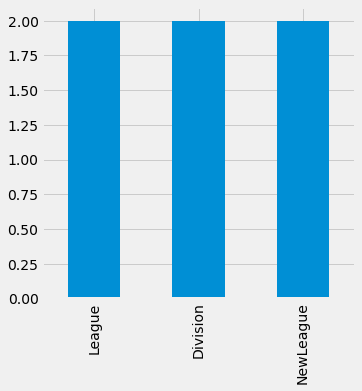

In [27]:
dataset[categorical_features].nunique().sort_values(ascending = False).plot.bar(figsize = (5, 5))

plt.show()

> Above plot shows, how many unique categories each feature has.

<h4>Plotting Salary based on the above categorical features</h4>

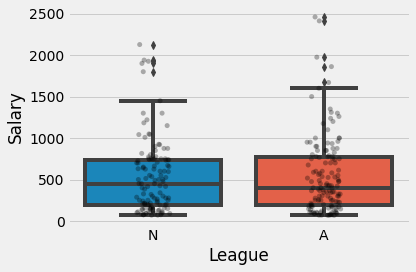

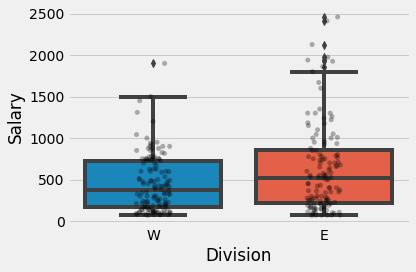

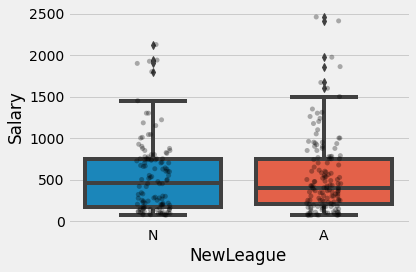

In [28]:
for feature in categorical_features:
    sns.catplot(x = feature, y = 'Salary', data = dataset, kind = 'box', height = 4, aspect = 1.5)
    sns.stripplot(x = feature, y = 'Salary', data = dataset, jitter = 0.1, alpha = 0.3, color = 'k')
    
    plt.show()
    

> As we can clearly see that, salaries are very similary or almost same in the current Leauge and NewLeague.

# Feature Engineering
<a id='feature_eng'></a>

In [29]:
dataset.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  
5   336     194      A        W      282      421      25   750.0         A

<h2>Seperating train and test set</h2>
<a id='split'></a>

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(['Salary'], axis = 1),
    dataset['Salary'],
    test_size = 0.40,
    random_state = 0 
)

print(X_train.shape, X_test.shape)

(157, 19) (106, 19)


In [31]:
y_train = np.log(y_train)
y_test = np.log(y_test)

> During data analyis we saw that the log transformation performs better when compared to others.

<h2>Numerical Feature Transformations</h2>
<a id='numerical_trans'></a>

<h3>Yeojohnson Transformation</h3>
<a id='yeo_trans'></a>

In [32]:
yeojohnson = YeoJohnsonTransformer(variables = to_yeojohnson)
yeojohnson.fit(X_train, y_train)

X_train = yeojohnson.transform(X_train)
X_test = yeojohnson.transform(X_test)

<h3>Box-Cox Transformation</h3>
<a id='box_trans'></a>

In [33]:
boxcox = BoxCoxTransformer(variables = to_boxcox)
boxcox.fit(X_train, y_train)

X_train = boxcox.transform(X_train)
X_test = boxcox.transform(X_test)

<h3>Square root Transformation</h3>
<a id='sqrt_trans'></a>

In [34]:
sqrt = PowerTransformer(variables = to_sqrt, exp = 0.5)
sqrt.fit(X_train, y_train)

X_train = sqrt.transform(X_train)
X_test = sqrt.transform(X_test)

<h2>Handling Outliers</h2>
<a id="handle_outliers"></a>

In [35]:
# from feature_engine.outliers import Winsorizer

# outliers = ['HmRun', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']

# windsoriser = Winsorizer(capping_method='quantiles', tail='both', fold=0.08, variables=outliers)
# windsoriser.fit(X_train)

# X_train = windsoriser.transform(X_train)
# X_test = windsoriser.transform(X_test)

> Capping the variable distribution at max or min value

> capping_method: Desired outlier detection method. Can take 'gaussian', 'iqr' or 'quantiles'.

> tail: Whether to look for outliers on the right, left or both tails of the distribution. Can take 'left', 'right' or 'both'.

> fold: The factor used to multiply the std or IQR to calculate the maximum or minimum allowed values. Recommended values are 2 or 3 for the gaussian approximation,
and 1.5 or 3 for the IQR proximity rule.

<h2>Categorical Features</h2>
<a id="cat_features"></a>

In [36]:
ordinal = OrdinalEncoder(variables = categorical_features)
ordinal.fit(X_train, y_train)

X_train = ordinal.transform(X_train)
X_test = ordinal.transform(X_test)

In [37]:
X_train.head()

AtBat       Hits     HmRun       Runs       RBI     Walks     Years  \
237  262.783061  25.237007  2.723054  14.635882  4.358899  4.582576  2.123186   
81   284.453512  30.012213  2.981460  16.481575  5.916080  6.557439  3.619162   
75   478.653006  45.100912  2.723054  18.216948  6.782330  3.605551  2.868528   
184  666.604972  56.214267  4.022406  21.240765  8.888194  7.280110  2.868528   
61   170.912115  20.890218  2.723054   9.289073  4.795832  3.872983  3.720807   

        CAtBat      CHits    CHmRun      CRuns       CRBI     CWalks  League  \
237  20.412508  13.003476  4.323253   9.734375   8.049727   6.926347       0   
81   32.864838  21.440086  8.099975  16.977406  12.797059  12.027737       1   
75   28.052394  18.673026  4.823076  13.435967  10.502489   7.061756       0   
184  26.694511  17.718325  6.695284  12.489768  11.968899   9.277322       1   
61   33.333978  21.336468  7.057366  15.207364  13.091584  11.871231       1   

     Division    PutOuts   Assists    Errors  NewLeague  
237         1  11.265575  0.729679  2.000000          0  
81          1   7.096414  5.457428  2.828427          1  
75          1  12.373511  8.827090  2.828427          1  
184         1  11.473250  3.223890  2.000000          1  
61          1   7.207631  6.356135  1.732051          1

# Feature Scaling
<a id="scaling"></a>

In [38]:
scaler = StandardScaler()
scaler.fit(X_train, y_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Regression Models
<a id="models"></a>

In [39]:
def model_evaluation(y, y_pred, method = 'plot'):
    
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    if method == 'plot':
        fig = plt.figure(figsize = (18, 6))
    
        plt.subplot(1, 3, 1)
        sns.regplot(x = y, y = y_pred, line_kws = {'color': 'r'}, label = 'r2 score: {:.2f}'.format(r2_score(y, y_pred)))
        plt.legend(loc = 'upper center')

        plt.subplot(1, 3, 2)
        errors = y - y_pred
        errors.hist(bins = 30, )
        plt.xlabel('Error Distribution')

        plt.subplot(1, 3, 3)
        plt.barh(y = 'MSE', width = mse, height = 1.0)
        plt.barh(y = 'MAE', width = mae)
        plt.barh(y = 'r2', width = r2)
        plt.xlabel('Metric Bars')

        plt.show()
    
    if method == 'metrics':
        
        return [mse, mae, r2]

> #### When method = plot: The functions plots scatterplot, error distrbution plot and regression metrics between original (y) and predicted output variable (y_pred)

In [40]:
# plt.style.use('fivethirtyeight')

<h2>Linear Regression</h2>
<a id="linear"></a>

In [41]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

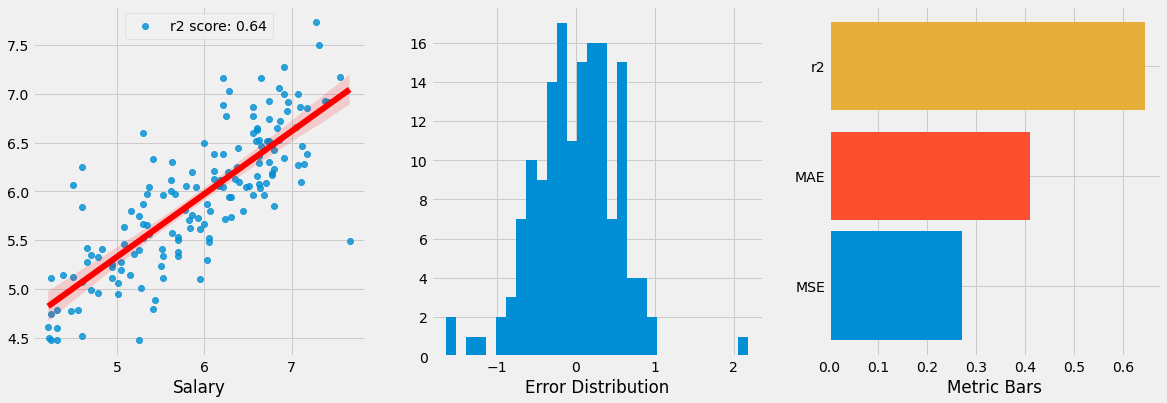

In [42]:
linear_train_mse, linear_train_mae, linear_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

model_evaluation(y_train, y_train_pred)

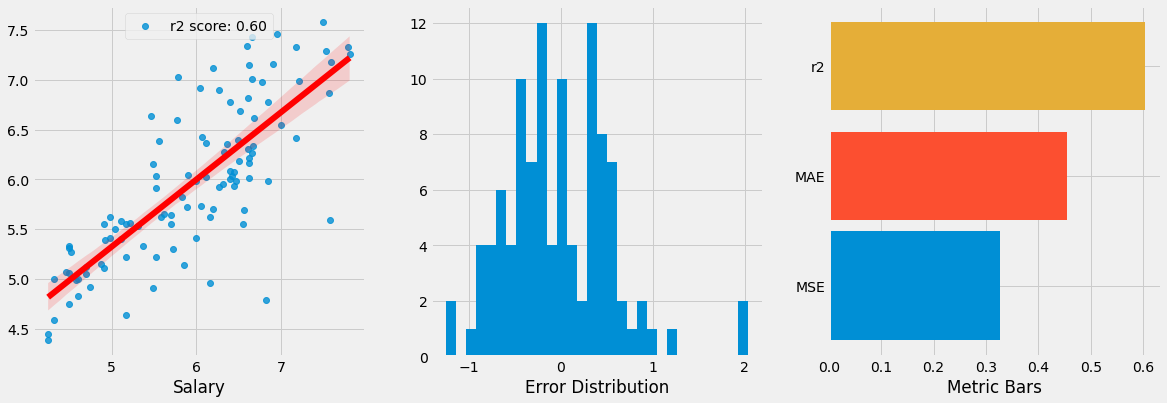

In [43]:
linear_test_mse, linear_test_mae, linear_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

model_evaluation(y_test, y_test_pred)

> #### As we can see, on train set we scored 0.64 and on test set we scored 0.60. Not bad!!! But linear regression can do much better if we eliminate outliers.

> #### We can improve the performance of linear regression model by following methods. 

> > ##### Regularization, Handling missing values or Null values by imputing missing values by model-based predictions or deleting null values, etc.
> > ##### We can also choose better categorical feature encoding, do extensive feature engineering, etc. 

> > > ##### Note: There are so many ways of improving model performance, I just pointed out few ways of doing it.

<h2>Huber Regression</h2>
<a id="huber"></a>

In [44]:
regressor_huber = HuberRegressor(max_iter = 1000, epsilon = 1.1)
regressor_huber.fit(X_train, y_train)

y_train_pred = regressor_huber.predict(X_train)
y_test_pred = regressor_huber.predict(X_test)

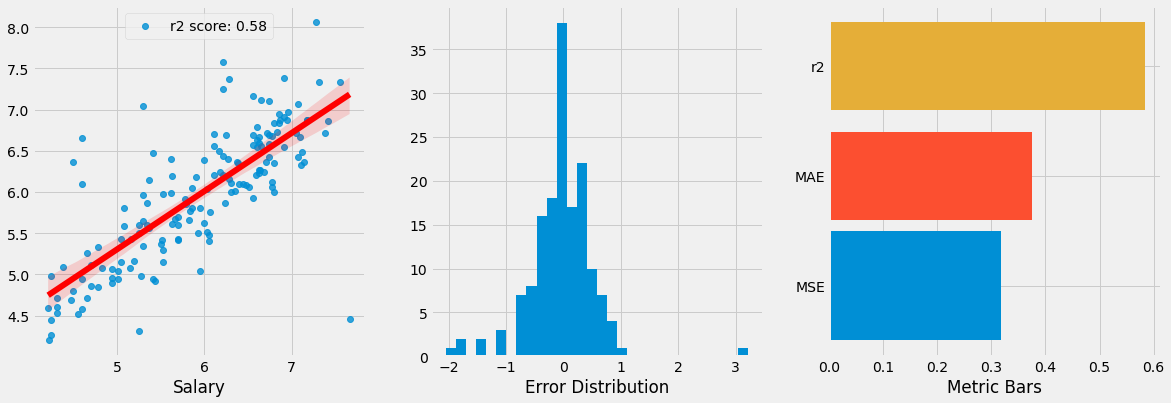

In [45]:
huber_train_mse,huber_train_mae, huber_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

model_evaluation(y_train, y_train_pred)

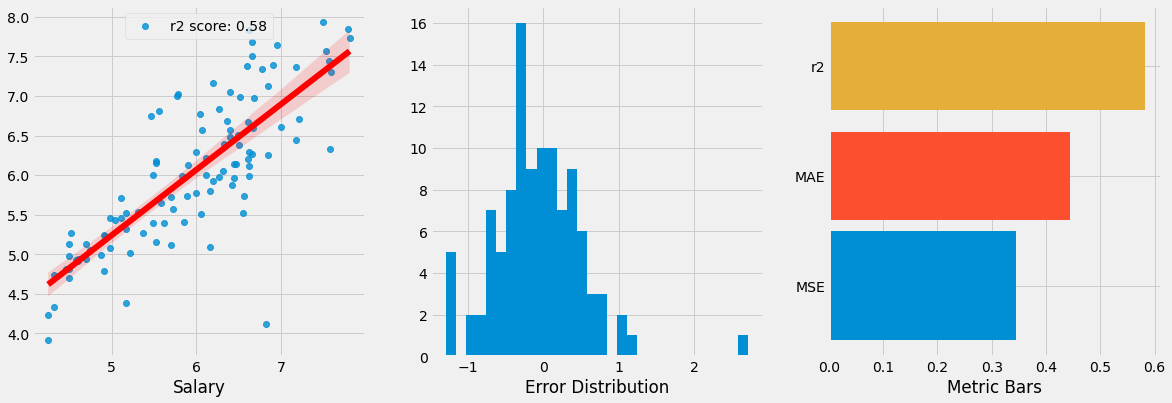

In [46]:
huber_test_mse, huber_test_mae, huber_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

model_evaluation(y_test, y_test_pred)

> #### Ever worried about getting the same score on both train and test data? The answer is it's totally fine. If we both got same score, then it means that the model is doing what it's supposed to do.

<h2>Support Vector Regressor</h2>
<a id="svr"></a>

In [47]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)


y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

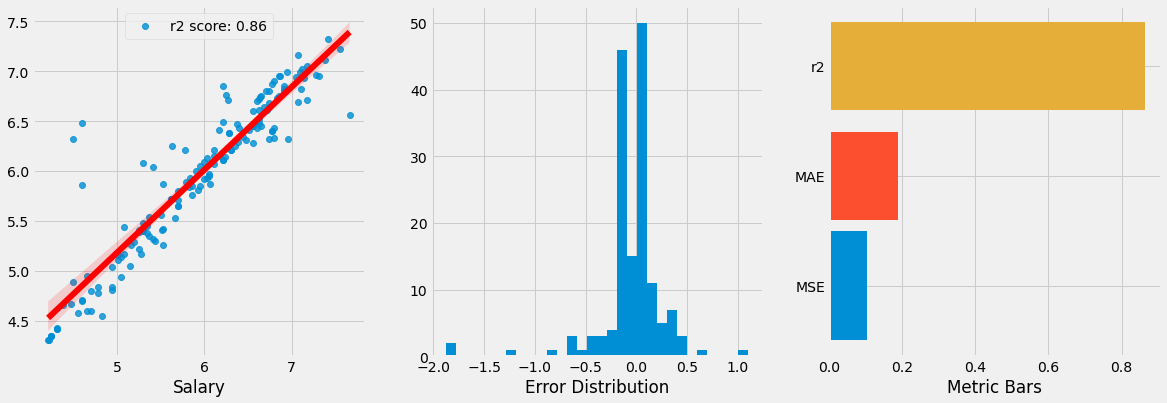

In [48]:
svr_train_mse, svr_train_mae, svr_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

model_evaluation(y_train, y_train_pred)

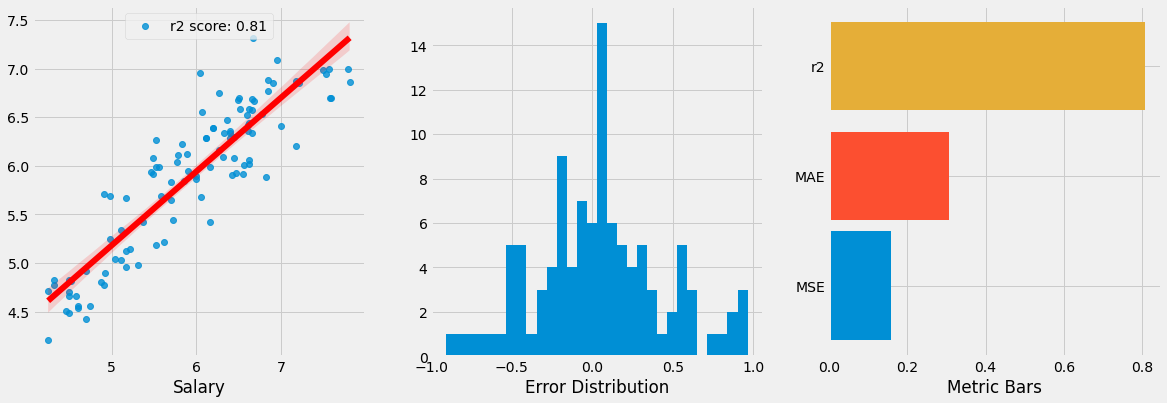

In [49]:
svr_test_mse, svr_test_mae, svr_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

model_evaluation(y_test, y_test_pred)

> #### Finally.... we have a winner! SVR performed very well on this dataset. On train set svr scored around 0.86 and on test set svr scored 0.81.
> #### We can see that the error distribution is in normal distribution and also the metrics MAE and MSE are less than other models. This is a positive sign.

<h2>Random Forest Regression</h2>
<a id="random"></a>

In [50]:
from sklearn.ensemble import RandomForestRegressor
random_tree = RandomForestRegressor(n_estimators = 200, random_state = 0, criterion = 'absolute_error')
random_tree.fit(X_train, y_train)

y_train_pred = random_tree.predict(X_train)
y_test_pred = random_tree.predict(X_test)

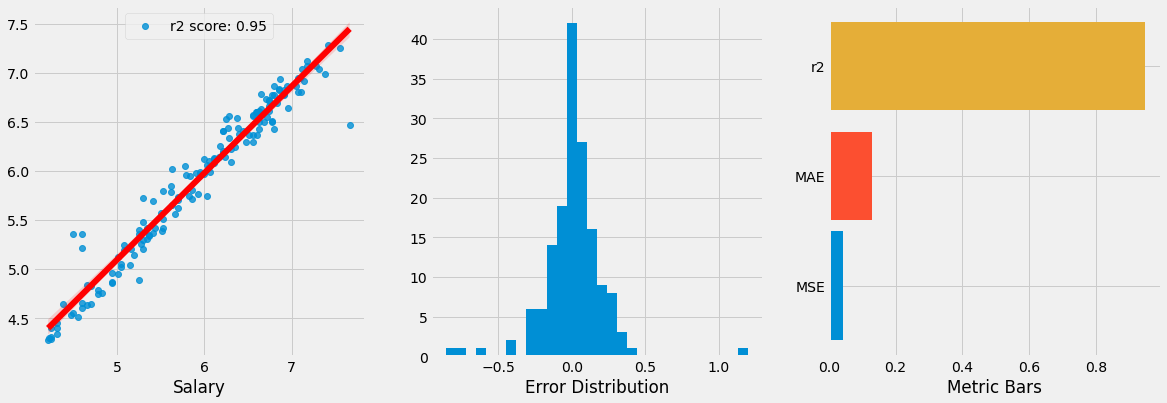

In [51]:
forest_train_mse, forest_train_mae, forest_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

model_evaluation(y_train, y_train_pred)

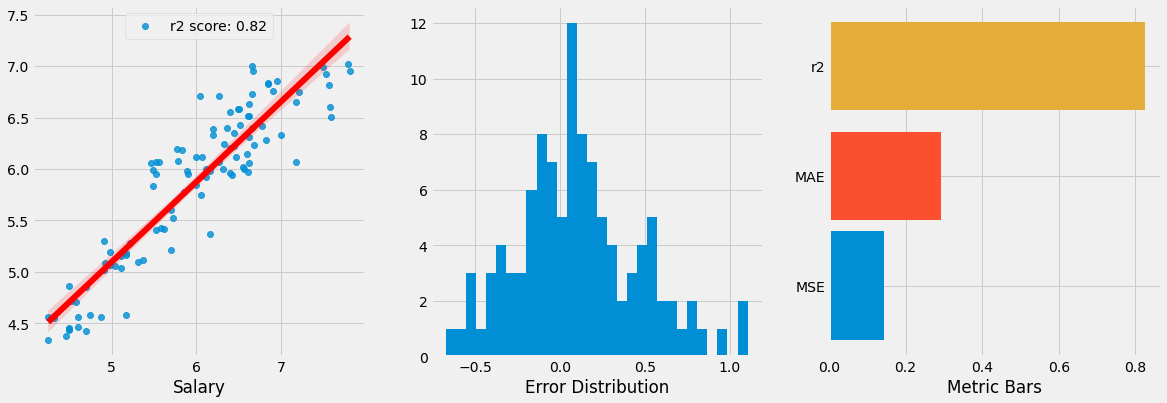

In [52]:
forest_test_mse, forest_test_mae, forest_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

model_evaluation(y_test, y_test_pred)

> #### Random Forest Regression performed pretty well but it might be overfitted to the train data. Even though we got 0.82 on test set, we can see that our model scored 0.95 on train set. (Meaning, our model is trying to fit all our data points in our train dataset).

<h2>Decision Tree Regression</h2>
<a id="decision"></a>

In [53]:
decision_tree = DecisionTreeRegressor(random_state = 0)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

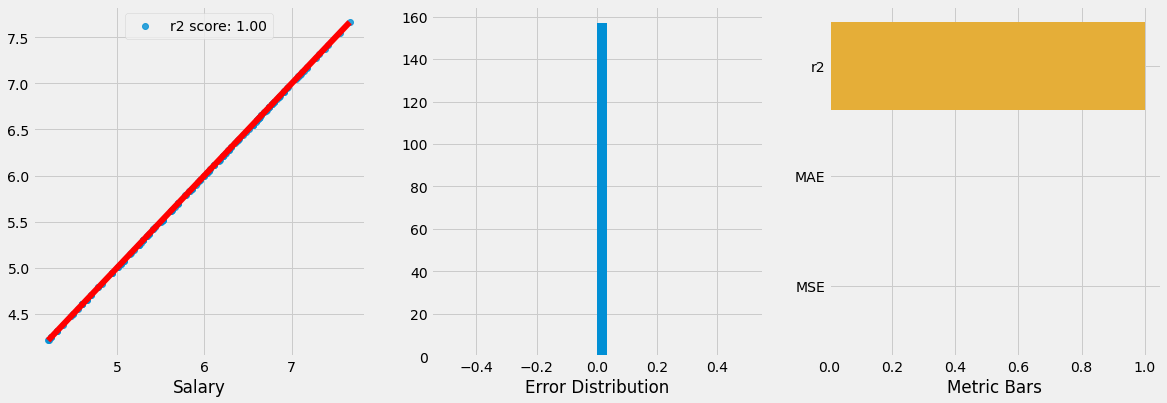

In [54]:
decision_train_mse, decision_train_mae, decision_train_r2 = model_evaluation(y_train, y_train_pred, method = 'metrics')

model_evaluation(y_train, y_train_pred)

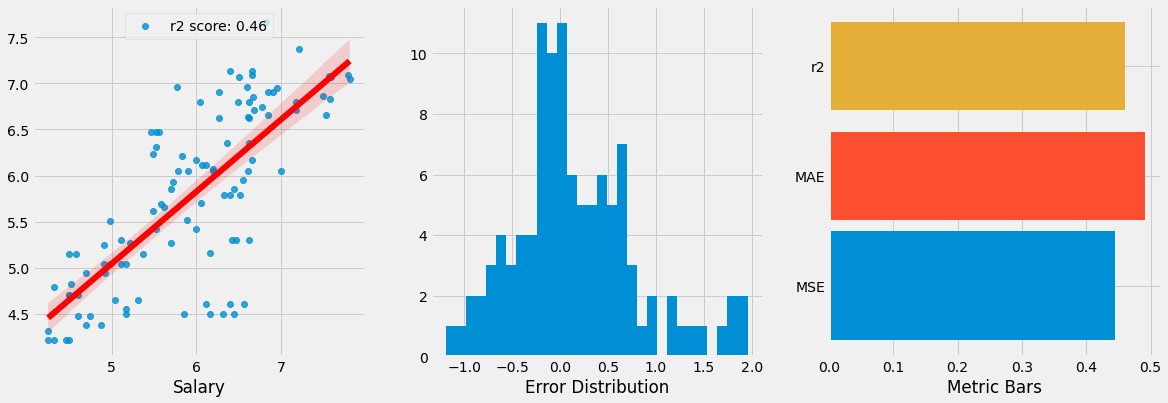

In [55]:
decision_test_mse, decision_test_mae, decision_test_r2 = model_evaluation(y_test, y_test_pred, method = 'metrics')

model_evaluation(y_test, y_test_pred)

> #### This is the best example one can see how overfitting works. We scored 1.0 (perfect score) on train set but on the test set we can see that, we only scored 0.46. This means that our model is fitted to train set alone. When we introduce we data to our model, it is trying very hard and failing to predict the outcomes of the new dataset.

> #### MAE and MSE are highest when compared to all models on test set but both are zero on the train set.

# Summary Metrics
<a id="metrics"></a>

> #### Instead of scrolling through every model for their metrics, I created a dataframe which shows all models used in this notebook along with their metrics.

In [56]:
summary_metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Huber Regression', 'Support Vector Machines', 'Randon Forest Regression', 'Decision Tree Regression'],
    'train_r2': [linear_train_r2, huber_train_r2, svr_train_r2, forest_train_r2, decision_train_r2],
    'test_r2': [linear_test_r2, huber_test_r2, svr_test_r2, forest_test_r2, decision_test_r2],
    'train_mse': [linear_train_mse, huber_train_mse, svr_train_mse, forest_train_mse, decision_train_mse],
    'test_mse': [linear_test_mse, huber_test_mse, svr_test_mse, forest_test_mse, decision_test_mse],
    'train_mae': [linear_train_mae, huber_train_mae, svr_train_mae, forest_train_mae, decision_train_mae],
    'test_mae': [linear_test_mae, huber_test_mae, svr_test_mae, forest_test_mae, decision_test_mae]
})

summary_metrics = summary_metrics.sort_values(by = ['test_r2'], ascending = False, ignore_index = True)

In [57]:
def color_code_r2_scores(value):

    if value < 0.80:
        color = 'red'
    elif value == 1.0:
        color = 'red'
    else:
        color = 'green'

    return 'color: %s' % color

In [58]:
summary_metrics.style.applymap(color_code_r2_scores, subset=['train_r2','test_r2']).set_properties(**{
    'background-color': 'white',
    'font-size': '14pt',
})